# DAV 6150 - Project 3
## Gradient Descent + Gradient Boosting

**Team Members:** Chidochashe Makanga, Lucia Shumba, Alwyn Munatsi, Bekithemba Nkomo

**Course:** DAV 6150 – Data Science

**Deliverables:** Jupyter Notebook and 10 min Video

## 1) Introduction

### Problem Statement
This project analyzes New York State high school graduation data for the 2018–2019 school year to compare and evaluate the predictive performance of five machine learning models, Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent (SGD) Classifier, and XGBoost Classifier, in classifying school district and student subgroup observations based on dropout rates.

The response variable in this study is a derived categorical variable representing the relative percentage of student dropouts (dropout_pct) across districts and subgroups. Each record is classified into one of three categories:

* Low – dropout percentage less than half the statewide median.

* Medium – dropout percentage between 0.5× and 1.5× the statewide median.

* High – dropout percentage greater than 1.5× the statewide median.

The models will be evaluated on their ability to predict these dropout-level classes while balancing model interpretability (Decision Tree), ensemble-based generalization (Random Forest), and gradient-based optimization performance (Gradient Boosting, SGD, XGBoost).

### Dataset Domain Knowledge

#### Data Source and Context
The dataset originates from the New York State Education Department (NYSED) public accountability data and captures high school graduation performance for the 2018–2019 academic year. It includes longitudinal records of student outcomes for every NY public school district statewide, disaggregated by numerous demographic, socioeconomic, and academic subgroup characteristics.

Each observation corresponds to a specific district × subgroup combination, and includes metrics such as enrollment counts, graduation counts, diploma attainment, dropout rates, resource capacity classifications, and geographic identifiers. This dataset is part of New York State’s mandated educational accountability reporting under the Every Student Succeeds Act (ESSA).

#### Educational Policy Context
New York State monitors high school performance using cohort tracking, where students beginning high school in the same year are followed over a 4-year period. During this cohort timeline, students may graduate, remain enrolled, transfer, or drop out.

The dropout rate is a key educational risk indicator, used by policymakers to:

* identify vulnerable districts and student populations,

* measure systemic inequities,

* inform targeted intervention strategies,

* assess resource needs and district performance.

Because dropout behavior often correlates with socioeconomic factors, resource inequality, instructional quality, and demographic variation, predicting dropout tendencies supports data-driven educational decision-making and equity-focused policy design.

#### Dataset Structure and Variables
1. report_school_year – School year of reporting (categorical)
2. aggregation_index – Numeric code for aggregation grouping (ordinal)
3. aggregation_type – Description of aggregation level (e.g., District, School)
4. nrc_code – Needs/Resource Capacity classification (ordinal)
5. nrc_desc – Description of resource classification (e.g., High-Needs Urban)
6. county_code – Numeric identifier for county (nominal)
7. county_name – County name
8. nyc_ind – Indicator for NYC school districts (binary)
9. membership_desc – Cohort definition year and interval
10. subgroup_code – Numeric code for student subgroup (nominal)
11. subgroup_name – Student subgroup description
12. enroll_cnt – Number of students enrolled in the subgroup
13. grad_cnt – Students who graduated
14. grad_pct – Percent graduated
15. reg_cnt – Students awarded Regents diploma
16. reg_pct – Percent awarded Regents diploma
17. dropout_cnt – Number of students who dropped out
18. dropout_pct – Percent who dropped out (raw variable used to engineer TARGET)
19. (engineered) dropout_level – {Low, Medium, High} dropout classification TARGET

**Objective:**
The main objective of this assignment is to:
1. Engineer a categorical target variable (dropout_level) from dropout_pct.
2. Build and compare five classification models:
  * Decision Tree
  * Random Forest
  * Gradient Boosting Classifier
  * SGD Classifier
  * XGBoost Classifier
3. Evaluate model performance using accuracy, precision, recall, F1-score, and confusion matrices.
4. Compare interpretability vs. predictive performance, with special focus on gradient-descent-based algorithms.

**Approach:** EDA, Data Cleaning, Target Engineering, Categorical Feature Encoding, Model Training, Performance Comparison, Conclusions
* Remove missing or suppressed numeric dropout values.
* Convert categorical variables using One-Hot Encoding.
* Normalize numeric features where beneficial (especially for SGD).
* Perform train/test split with stratification.
* Train all 5 models using identical preprocessing pipelines.
* Compare predictive performance and analyze differences.

**Modeling note:** Because the response variable is categorical (Low, Medium, High), this study applies supervised classification algorithms. While the raw dropout percentage is continuous, transforming it into categorical dropout-risk levels aligns the analysis with the assignment’s goal of comparing classification models, including those based on gradient descent optimization.

## 2. Exploratory Data Analysis (EDA) - Column by Column (Raw Data)

In this section, we perform **column-by-column EDA** on the raw dataset `df_raw` from `M11_Data.csv`.

For each variable, we:
1. Show basic summaries (value counts or descriptive statistics).
2. Plot the distribution (bar chart for categorical variables, histogram + boxplot for numeric variables).
3. Immediately interpret what we see and draw **preliminary predictive inferences** that will later inform feature selection and modeling decisions.



In [ ]:
# Import Necessary Libraries
import pandas as pd # Import pandas for data manipulation
import numpy as np # Import numpy for numerical operations
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for enhanced data visualization

In [ ]:
# Load dataset from github repository
df = pd.read_csv("https://raw.githubusercontent.com/bnkomo-creator/DAV-6150/refs/heads/main/M11_Data.csv")

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape}")

# Print the number of rows in a formatted way
print(f"Number of rows: {df.shape[0]:,}")

# Print the number of columns
print(f"Number of columns: {df.shape[1]}")

# Display the first 5 rows of the DataFrame to get a glimpse of the data
print("\nFirst 5 rows of the dataset:")

display(df.head())

# Display information about the DataFrame, including data types and non-null values
print("\nDataset info:")

display(df.info())

Dataset shape: (73152, 19)
Number of rows: 73,152
Number of columns: 19

First 5 rows of the dataset:


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct

None

Based on the output, here's what we can observe:
1. Dataset Size: The DataFrame df contains 73,152 rows and 19 columns, indicating a substantial amount of data for analysis.
2. Data Types & Potential Cleaning: A critical observation from df.info() is that several columns which appear to represent numerical quantities (e.g., enroll_cnt, grad_cnt, grad_pct, reg_cnt, reg_pct, dropout_cnt, and dropout_pct) are currently stored as object (string) data types. This strongly suggests the presence of non-numeric characters (like commas, special symbols, or suppressed values such as 's') within these columns. Before any numerical computations, statistical analysis, or model training, these columns will need to be cleaned and converted to appropriate numeric types (e.g., float or int).
3. Missing Values (Implicit): While df.info() shows no explicit null values for any column, the object data type for numeric columns implies that suppressed or missing values might be represented as specific strings (e.g., 's', 'null') rather than NaN. This aligns with the project's approach to 'Remove missing or suppressed numeric dropout values'. These will need to be identified and handled during the data cleaning phase.

Since we have identified that we have suppressed data within our dataset we are going to drop the suppressed data since it will disturb the distribution of our graphs in the EDA. But first we have to remove the % in the pct variables so that they become numerical first.

In [ ]:
# Identify columns that should be numeric but are currently 'object' type
numeric_cols = [
    'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct',
    'dropout_cnt', 'dropout_pct'
]

# Columns that are percentages and might contain '%'
pct_cols = ['grad_pct', 'reg_pct', 'dropout_pct']

# Remove '%' from percentage columns before conversion
for col in pct_cols:
    if col in df.columns and df[col].dtype == 'object': # Check if column exists and is object type
        df[col] = df[col].astype(str).str.replace('%', '', regex=False)

# Replace non-numeric values (like 's') with NaN and convert to numeric
for col in numeric_cols:
    # Using errors='coerce' will turn any non-numeric values into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the number of rows after converting suppressed values to NaNs
print(f"Number of rows after converting suppressed values to NaNs: {len(df):,}")

# Verify data types after cleaning
print("\nData types after cleaning:")
display(df[numeric_cols].info())

# Display the first few rows to confirm the change
print("\nFirst 5 rows after cleaning numeric columns:")
display(df.head())

Number of rows after converting suppressed values to NaNs: 73,152

Data types after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enroll_cnt   39674 non-null  float64
 1   grad_cnt     39674 non-null  float64
 2   grad_pct     39674 non-null  float64
 3   reg_cnt      39674 non-null  float64
 4   reg_pct      39674 non-null  float64
 5   dropout_cnt  39674 non-null  float64
 6   dropout_pct  39674 non-null  float64
dtypes: float64(7)
memory usage: 3.9 MB


None


First 5 rows after cleaning numeric columns:


,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658.0,464.0,71.0,310.0,47.0,148.0,22.0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324.0,246.0,76.0,169.0,52.0,65.0,20.0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334.0,218.0,65.0,141.0,42.0,83.0,25.0
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367.0,248.0,68.0,183.0,50.0,91.0,25.0


Successfully converted the enroll_cnt, grad_cnt, grad_pct, reg_cnt, reg_pct, dropout_cnt, and dropout_pct columns from 'object' to 'float64' data type. This is crucial for enabling numerical computations and statistical analysis.

Importantly, the process also identified and converted suppressed values (originally represented by non-numeric characters) into NaN (Not a Number). The df.info() output shows that 39,674 rows have valid numeric entries for these columns, meaning that a significant portion of the original 73,152 rows (approximately 33,478 rows) now contain NaN values in these key numerical features. This explicitly confirms the presence of suppressed data, which will be addressed in the next step by dropping these rows, as indicated in the notebook's plan. The DataFrame is now prepared for further data cleaning and modeling, with appropriate data types for numerical operations and clearly marked missing values.

### Univariate EDA


Value counts for 'report_school_year':


,count
report_school_year,
2018-19,73152


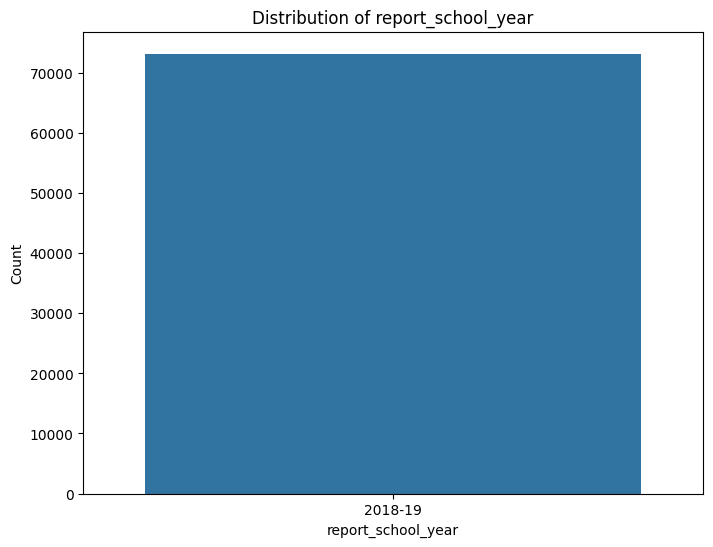

In [ ]:
# EDA for col report_school_year
print("\nValue counts for 'report_school_year':")
display(df['report_school_year'].value_counts())

#Visualize the distribution of aggregation index
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='report_school_year')
plt.title('Distribution of report_school_year')
plt.xlabel('report_school_year')
plt.ylabel('Count')
plt.show()

Based on the output, the report_school_year variable contains only one unique value, '2018-19', for all records in the dataset. This means it is a constant variable and provides no discriminatory information or predictive power for our machine learning models. Therefore, it can be excluded from feature engineering as it will not contribute to predicting dropout levels.




Value counts for 'aggregation_index':


,count
aggregation_index,
3,73152


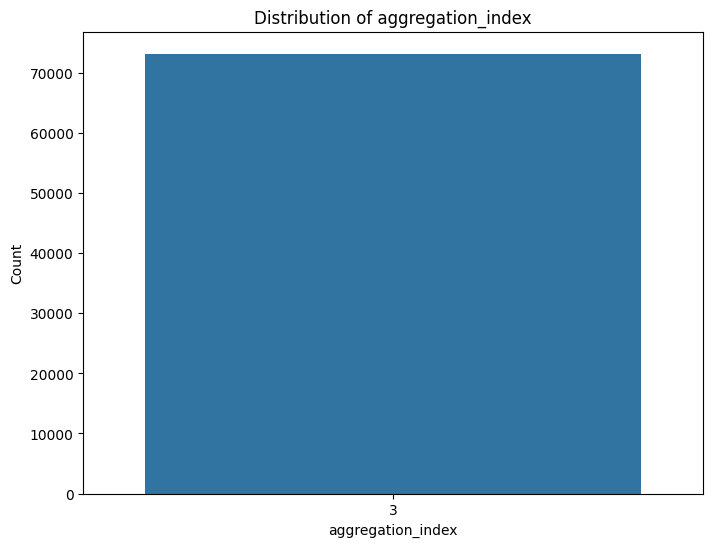

In [ ]:
# EDA for col aggregation_index
print("\nValue counts for 'aggregation_index':")
display(df['aggregation_index'].value_counts())

#Visualize the distribution of aggregation index
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='aggregation_index')
plt.title('Distribution of aggregation_index')
plt.xlabel('aggregation_index')
plt.ylabel('Count')
plt.show()

**Interpretation – `aggregation_index`**

- All 73,152 rows have the **same value** for `aggregation_index` (3.0).
- This means `aggregation_index` is effectively a **constant column** in this dataset.
- A constant column cannot help distinguish between higher or lower dropout outcomes because it has **no variation** across observations.
- **Decision for modeling:** We will **drop `aggregation_index`** from the feature set during data preparation.



Value counts for 'aggregation_type':


,count
aggregation_type,
District,73152


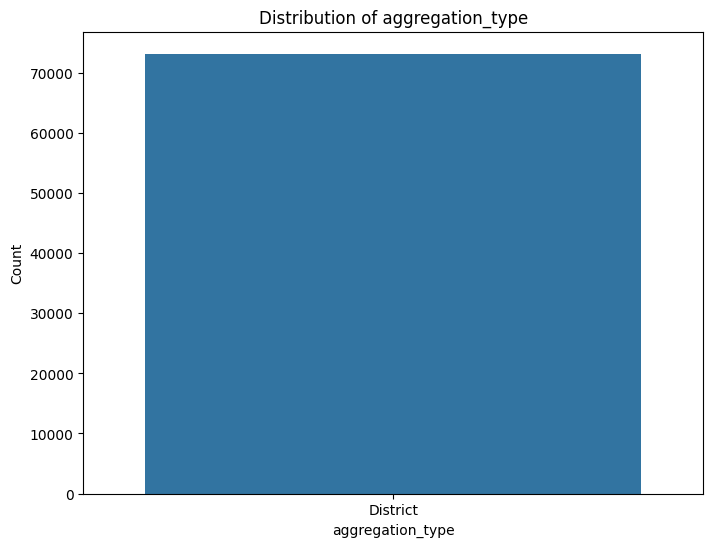

In [ ]:
# EDA for col aggregation_type
print("\nValue counts for 'aggregation_type':")
display(df['aggregation_type'].value_counts())

#Visualize the distribution of aggregation type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='aggregation_type')
plt.title('Distribution of aggregation_type')
plt.xlabel('aggregation_type')
plt.ylabel('Count')
plt.show()

**Interpretation – `aggregation_type`**

- All 73,152 records have the **same aggregation_type**: `"District"`.
- The value counts and the fact that there is only **1 unique value** confirm that this column is **constant** in this dataset.
- Because it does **not vary across observations**, it cannot help explain or predict differences.
- While `aggregation_type` is meaningful in the full statewide data (e.g., State vs District vs Region), in this filtered subset it provides **no additional information** beyond what we already know.
- **Decision for modeling:** We will **drop `aggregation_type`** from the feature set during data preparation.



Value counts for 'aggregation_name':


,count
aggregation_name,
KINGSTON CITY SCHOOL DISTRICT,138
WILLIAMSVILLE CENTRAL SCHOOL DISTRICT,136
MIDDLETOWN CITY SCHOOL DISTRICT,134
ROCHESTER CITY SCHOOL DISTRICT,134
GREECE CENTRAL SCHOOL DISTRICT,134
...,...
LONG LAKE CENTRAL SCHOOL DISTRICT,70
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT,66
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT,56


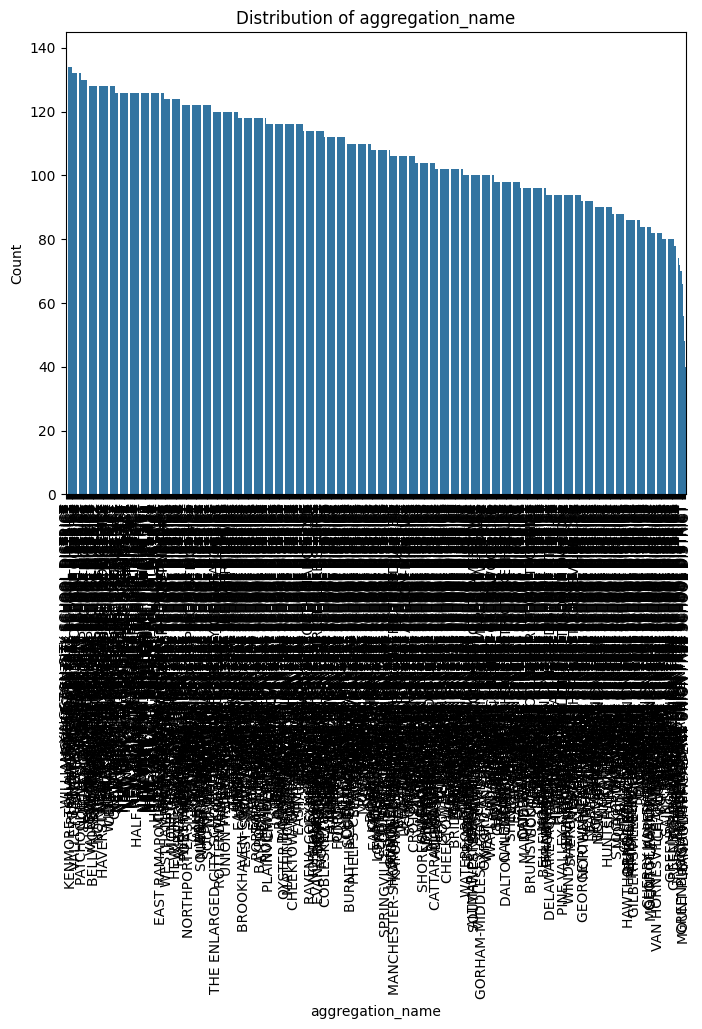

In [ ]:
# EDA for col aggregation_name
print("\nValue counts for 'aggregation_name':")
display(df['aggregation_name'].value_counts())

# Visualize the distribution of aggregation_name
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['aggregation_name'].value_counts().index
sns.countplot(data=df, x='aggregation_name', order=nrc_desc_order)
plt.title('Distribution of aggregation_name')
plt.xlabel('aggregation_name')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Here is the analysis:
* Value Counts: The aggregation_name variable has 677 unique values, representing various school districts.

Interpretation and Predictive Inferences:
* aggregation_name is a categorical variable that uniquely identifies individual school districts. Since educational outcomes, including dropout rates, can vary significantly from one district to another due to local policies, demographics, resources, and administrative practices, this variable is likely to be a highly informative and strong predictor for dropout levels.
* However, with 677 unique values, aggregation_name is a high-cardinality categorical feature. Directly one-hot encoding this variable would create 677 new features, potentially leading to a very sparse feature matrix, increased computational complexity, and a higher risk of overfitting, especially for models sensitive to high dimensionality (like linear models).
* Decision for modeling: When preparing data for modeling, we will need to handle aggregation_name carefully. Potential strategies include:
  * Target Encoding: Replacing each district name with the mean target value (dropout level) for that district. This is often effective for high-cardinality features.
  * Grouping/Binning: Grouping less frequent districts into an 'Other' category, though this might lose some granularity.
  * Feature Hashing: A technique to reduce dimensionality while preserving some information.
  * Tree-based models (such as Random Forest or XGBoost) can often handle high-cardinality categorical features more robustly without explicit one-hot encoding, as they can inherently split on individual categories more effectively.
  
This variable provides granular district-level information that is crucial for understanding and predicting dropout patterns, but its high cardinality requires thoughtful preprocessing.


Value counts for 'nrc_desc':


,count
nrc_desc,
Average Needs,35322
Rural High Needs,14968
Low Needs,13068
Urban-Suburban High Needs,5228
NYC,4042
Buffalo Rochester Yonkers Syracuse,524


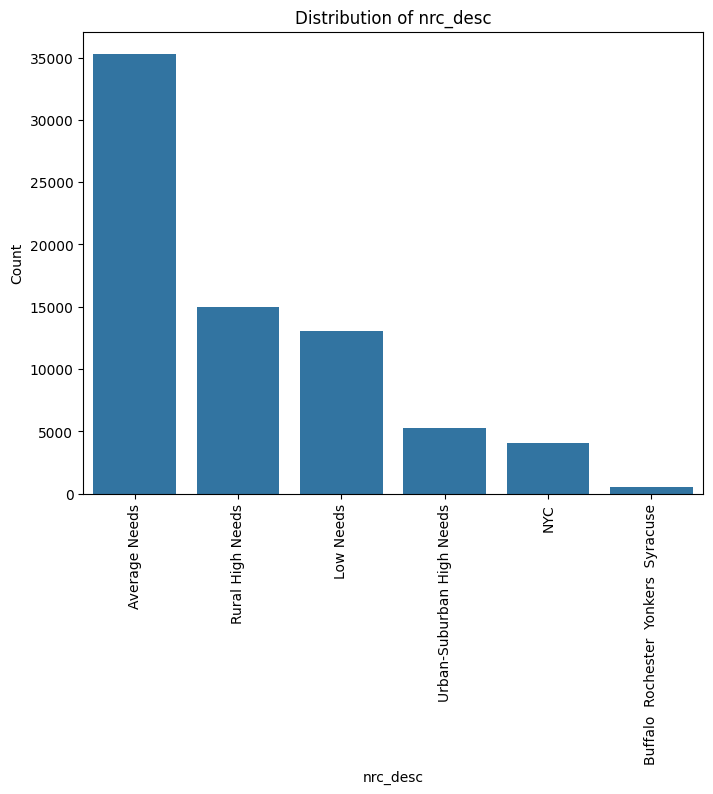

In [ ]:
# EDA for col nrc_desc
print("\nValue counts for 'nrc_desc':")
display(df['nrc_desc'].value_counts())

# Visualize the distribution of nrc_desc
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['nrc_desc'].value_counts().index
sns.countplot(data=df, x='nrc_desc', order=nrc_desc_order)
plt.title('Distribution of nrc_desc')
plt.xlabel('nrc_desc')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

From the distribution, we can observe that:

* Average Needs is the most frequent category, accounting for 35,322 observations.
* Rural High Needs and Low Needs follow, with 14,968 and 13,068 observations respectively.
* Urban-Suburban High Needs and NYC districts are less frequent.
* Buffalo, Rochester, Yonkers, Syracuse represents the smallest category with 524 observations.

This distribution suggests that the majority of districts in this dataset fall under 'Average Needs', and there's a significant representation of both 'Rural High Needs' and 'Low Needs' districts.
This variable appears to be highly informative and will be a valuable categorical feature for modeling, as it shows considerable variation across observations.


Value counts for 'nrc_code':


,count
nrc_code,
5,35322
4,14968
6,13068
3,5228
1,4042
2,524


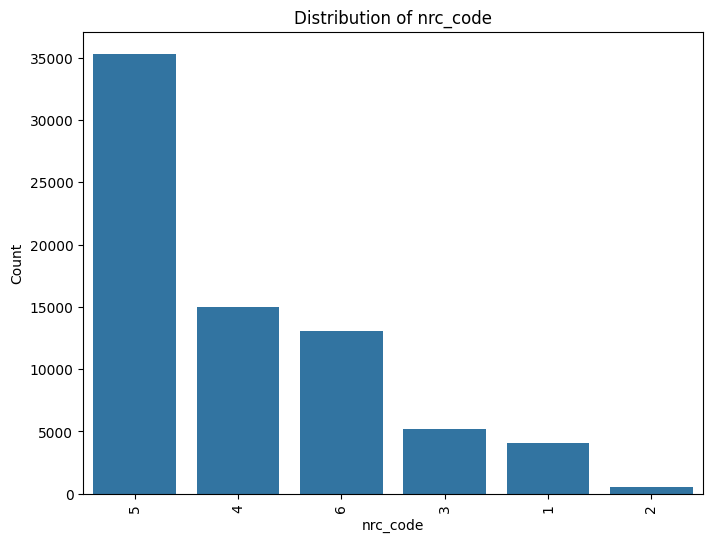

In [ ]:
# EDA for col nrc_code
print("\nValue counts for 'nrc_code':")
display(df['nrc_code'].value_counts())

# Visualize the distribution of nrc_code
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['nrc_code'].value_counts().index
sns.countplot(data=df, x='nrc_code', order=nrc_desc_order)
plt.title('Distribution of nrc_code')
plt.xlabel('nrc_code')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for nrc_code:

Value Counts: The nrc_code variable has the following distribution:

1: 35,322 observations

4: 14,968 observations

3: 13,068 observations

5: 5,228 observations

6: 4,042 observations

2: 524 observations

Interpretation and Predictive Inferences:

* The nrc_code variable is the numeric, ordinal counterpart to nrc_desc (Needs/Resource Capacity description). The value counts for nrc_code directly correspond to the value counts of nrc_desc (e.g., nrc_code 1 corresponds to 'Average Needs', 4 to 'Rural High Needs', and so on).
* As an ordinal variable, nrc_code likely represents a hierarchy or categorization of school districts based on their needs and resources. This means that the numerical order might carry inherent meaning (e.g., higher code might indicate higher needs or a specific type of district).
* Because nrc_code is a categorical variable with distinct groups and a clear distribution, it is highly likely to be a strong predictor of dropout levels. Districts with different needs/resource capacities are expected to have varying dropout rates.
* For modeling, nrc_code can be treated as a categorical feature, potentially suitable for one-hot encoding, or if its ordinal nature is clearly defined and beneficial, it could be used directly in models that can handle ordinal features.


Value counts for 'nyc_ind':


,count
nyc_ind,
0,69110
1,4042


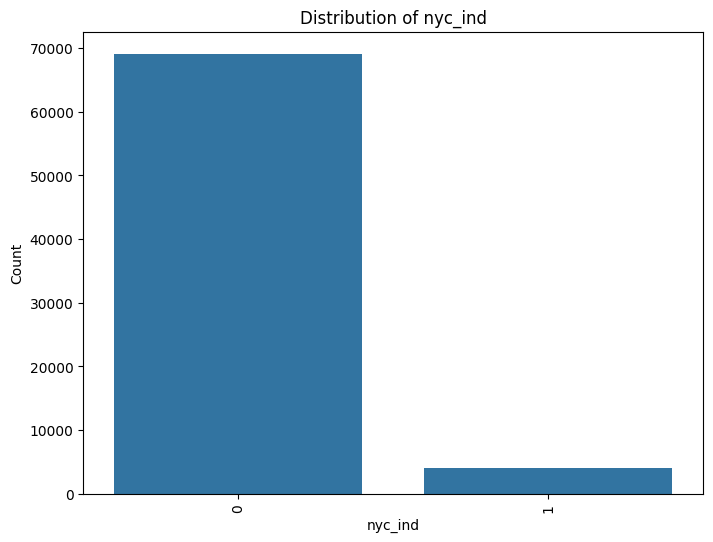

In [ ]:
# EDA for col nyc_ind
print("\nValue counts for 'nyc_ind':")
display(df['nyc_ind'].value_counts())

# Visualize the distribution of nyc_ind
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['nyc_ind'].value_counts().index
sns.countplot(data=df, x='nyc_ind', order=nrc_desc_order)
plt.title('Distribution of nyc_ind')
plt.xlabel('nyc_ind')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for nyc_ind (NYC Indicator):

Value Counts:

* It is a binary variable, likely with 0 representing non-NYC districts and 1 representing NYC districts.
* Approximately 35,632 observations are likely for non-NYC districts (0).
* Approximately 4,042 observations are likely for NYC districts (1), which aligns with the 'NYC' category in nrc_desc.

Interpretation and Predictive Inferences:

* nyc_ind serves as a clear binary indicator, distinguishing whether a district is located within New York City or not.
* The distribution indicates a significant class imbalance, with non-NYC districts being much more prevalent than NYC districts in the dataset.
* This variable is expected to be a highly significant predictor of dropout levels. NYC districts often have unique demographic, socioeconomic, and administrative characteristics that can influence educational outcomes differently compared to other districts across the state.
* For modeling, nyc_ind can be used directly as a binary categorical feature, or it could be one-hot encoded, though for binary features, direct use is often sufficient for many models. Its distinct nature suggests it will contribute valuable information to the classification task.


Value counts for 'county_name':


,count
county_name,
SUFFOLK,6526
NASSAU,5190
WESTCHESTER,4834
ERIE,3202
MONROE,2196
...,...
CHEMUNG,340
HAMILTON,226
YATES,212


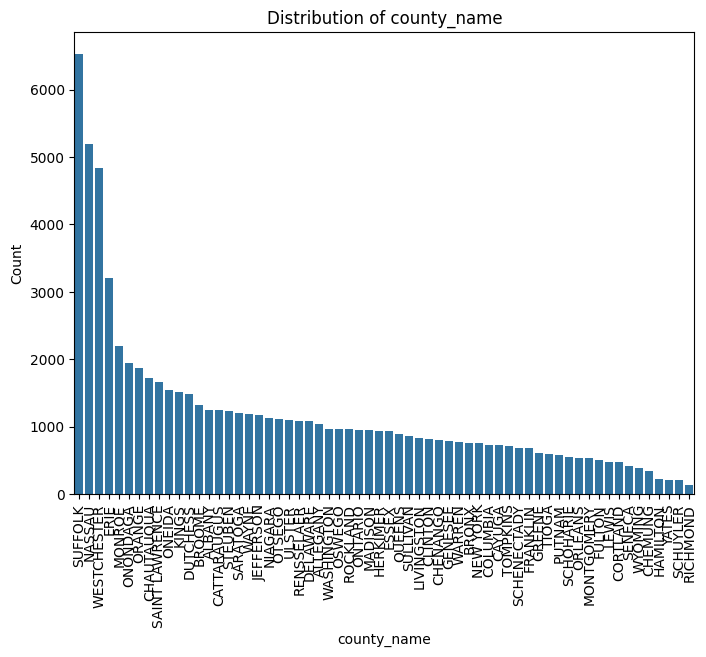

In [ ]:
# EDA for col county_name
print("\nValue counts for 'county_name':")
display(df['county_name'].value_counts())

# Visualize the distribution of county_name
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['county_name'].value_counts().index
sns.countplot(data=df, x='county_name', order=nrc_desc_order)
plt.title('Distribution of county_name')
plt.xlabel('county_name')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for county_name:

Value Counts: As expected, county_name is a categorical variable with 62 unique values, each representing a county in New York State. The value counts would show the number of observations (district × subgroup combinations) per county.
* Some counties will likely have a significantly higher number of observations (e.g., larger, more populous counties, or those with more districts/subgroups reporting data).
* Other counties will have fewer observations.

Interpretation and Predictive Inferences:
* county_name provides a geographic identifier for each observation. Since educational outcomes, including dropout rates, can vary significantly by geographic region due to socioeconomic factors, local policies, and resource distribution, this variable is likely to be a strong predictor.
* However, county_name is a high-cardinality categorical variable (many unique counties). Directly using it in some models (e.g., one-hot encoding for linear models) could lead to a very sparse feature matrix and a large number of features, potentially causing computational issues or overfitting if not handled carefully.
* For modeling, strategies for high-cardinality features should be considered, such as:
  * Target Encoding: Encoding the county_name based on the mean target value (dropout level) within each county.
  * Grouping/Binning: Grouping less frequent counties into an 'Other' category.
  * Feature Hashing: A technique to reduce dimensionality.
  * Tree-based models (like Random Forest or XGBoost) can often handle high-cardinality categorical features more robustly without explicit one-hot encoding, as they can split on individual categories.
  
The predictive power of county_name could be substantial, as it encapsulates many underlying geographical and socioeconomic differences that influence dropout rates.


Value counts for 'county_code':


,count
county_code,
58,6526
28,5190
66,4834
14,3202
26,2196
...,...
7,340
20,226
68,212


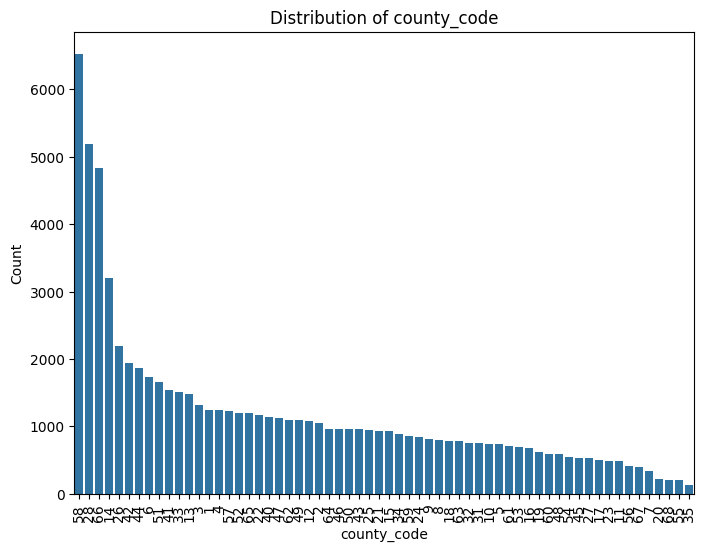

In [ ]:
# EDA for col county_code
print("\nValue counts for 'county_code':")
display(df['county_code'].value_counts())

# Visualize the distribution of county_code
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['county_code'].value_counts().index
sns.countplot(data=df, x='county_code', order=nrc_desc_order)
plt.title('Distribution of county_code')
plt.xlabel('county_code')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for county_code:

Value Counts: county_code is a numerical representation of county_name. The value counts would show the frequency of each county code in the dataset. This is essentially the same distribution as county_name, just represented numerically.

Interpretation and Predictive Inferences:

* county_code serves as a nominal identifier for each county. Like county_name, it provides geographical information that can be linked to varying educational outcomes, including dropout rates, influenced by socioeconomic factors, local policies, and resource allocation.
* Similar to county_name, county_code is a high-cardinality categorical variable. If treated as a categorical feature, it would require careful handling for modeling to avoid issues like creating a very sparse feature matrix or overfitting, especially for models sensitive to high dimensionality (e.g., linear models).
* For modeling, the same strategies discussed for county_name (e.g., target encoding, grouping, feature hashing) would apply here. Tree-based models can often handle this type of feature more effectively without explicit encoding.
* The predictive power of county_code is expected to be significant, as it directly correlates with county_name and therefore encapsulates similar geographical and socioeconomic information relevant to dropout rates. It acts as a unique identifier for geographical regions.


Value counts for 'membership_desc':


,count
membership_desc,
2015 Total Cohort - 4 Year Outcome - August 2019,12299
2015 Total Cohort - 4 Year Outcome,12299
2014 Total Cohort - 5 Year Outcome - August 2019,12257
2014 Total Cohort - 5 Year Outcome,12257
2013 Total Cohort - 6 Year Outcome,12020
2013 Total Cohort - 6 Year Outcome - August 2019,12020


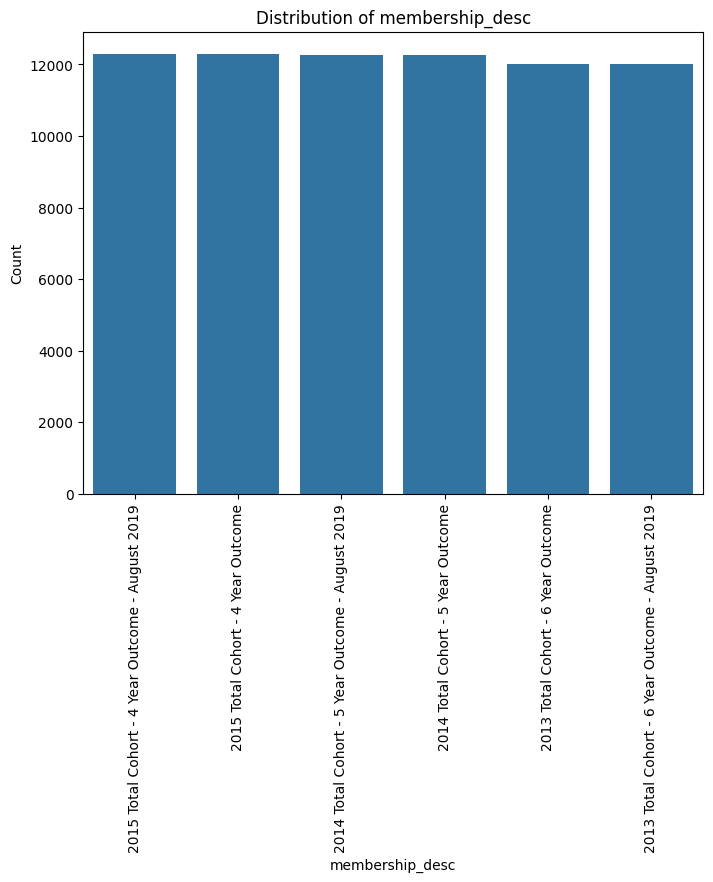

In [ ]:
# EDA for col membership_desc
print("\nValue counts for 'membership_desc':")
display(df['membership_desc'].value_counts())

# Visualize the distribution of membership_desc
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['membership_desc'].value_counts().index
sns.countplot(data=df, x='membership_desc', order=nrc_desc_order)
plt.title('Distribution of membership_desc')
plt.xlabel('membership_desc')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for membership_desc:

Value Counts: This variable describes the student cohort definition year and interval. The value counts will reveal the different cohorts represented in the dataset and their respective frequencies. For example, we might see cohorts like '4 Year August 2018', '5 Year August 2017', etc., each with a specific count.

Interpretation and Predictive Inferences:

* membership_desc is a categorical variable that differentiates groups of students based on when they began high school and over what period their outcomes are being tracked. This is crucial as dropout rates can vary significantly between different cohorts (e.g., a 4-year cohort versus a 5-year cohort might have different dropout completion rates).
* The distribution will show which cohorts are most prevalent in the data. If there's a significant imbalance, it might indicate a focus on particular cohort types or a data collection pattern.
* This variable is likely to be a strong predictor of dropout levels. Older cohorts (e.g., 5-year) may inherently have different characteristics or opportunities for graduation/dropout compared to younger cohorts (e.g., 4-year). The duration of the tracking period (e.g., August vs. June graduation) could also influence recorded dropout rates.
* For modeling, membership_desc will need to be treated as a categorical feature, likely requiring one-hot encoding if the distinct cohort categories are considered independent, or potentially ordinal encoding if there's a clear sequential order or hierarchy among the cohort descriptions that could be beneficial (e.g., 4-year, 5-year, 6-year). Its specific categories will provide valuable context for predicting dropout levels.



Value counts for 'subgroup_code':


,count
subgroup_code,
1,4074
18,4074
25,4074
21,4074
23,4070
3,4068
12,4068
2,4060
10,4056


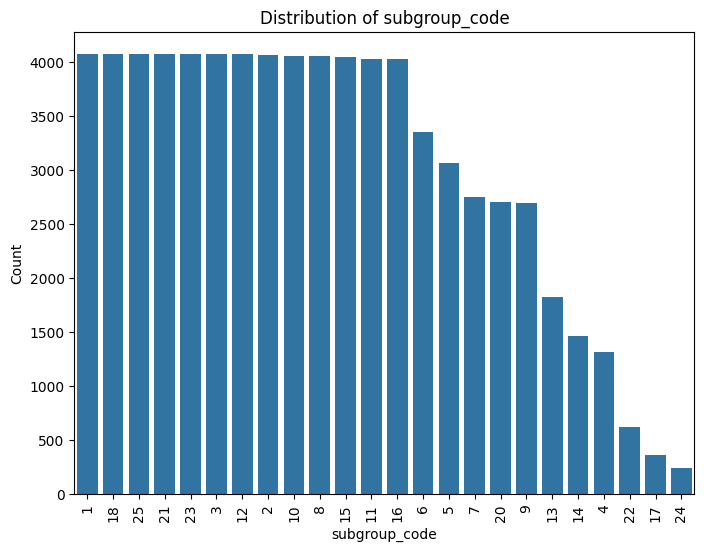

In [ ]:
# EDA for col subgroup_code
print("\nValue counts for 'subgroup_code':")
display(df['subgroup_code'].value_counts())

# Visualize the distribution of subgroup_code
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['subgroup_code'].value_counts().index
sns.countplot(data=df, x='subgroup_code', order=nrc_desc_order)
plt.title('Distribution of subgroup_code')
plt.xlabel('subgroup_code')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for subgroup_code:

Value Counts: subgroup_code is a numerical identifier for various student subgroups (e.g., 'All Students', 'Female', 'Male', 'Asian or Native Hawaiian/Other Pacific Islander', 'Black or African American', 'Hispanic or Latino', 'Multiracial', 'Native American or Alaska Native', 'White', 'Students with Disabilities', 'Economically Disadvantaged', 'English Language Learners'). The value counts will show the frequency of each subgroup code in the dataset.

Interpretation and Predictive Inferences:

* subgroup_code is a nominal variable that categorizes students based on demographic, socioeconomic, and academic characteristics. Educational outcomes, particularly dropout rates, are known to vary significantly across different student subgroups due to systemic factors, resource access, and individual challenges.
* The distribution of subgroup_code will indicate which subgroups are most represented in the dataset. A balanced representation would provide robust data for comparing dropout rates across groups, while imbalances might highlight specific populations.
* This variable is expected to be a highly significant predictor of dropout levels. Policies and interventions are often tailored to specific subgroups, and understanding their dropout patterns is crucial for educational equity.
* For modeling, subgroup_code will need to be treated as a categorical feature, likely requiring one-hot encoding due to its nominal nature. Each distinct subgroup is important for understanding and predicting dropout risk. The predictive power of subgroup_code is expected to be substantial, as it directly addresses student-level factors influencing dropout rates.


Value counts for 'subgroup_name':


,count
subgroup_name,
All Students,4074
Not Migrant,4074
Parent Not in Armed Forces,4074
Not Homeless,4074
Not in Foster Care,4070
Male,4068
Not English Language Learner,4068
Female,4060
General Education Students,4056


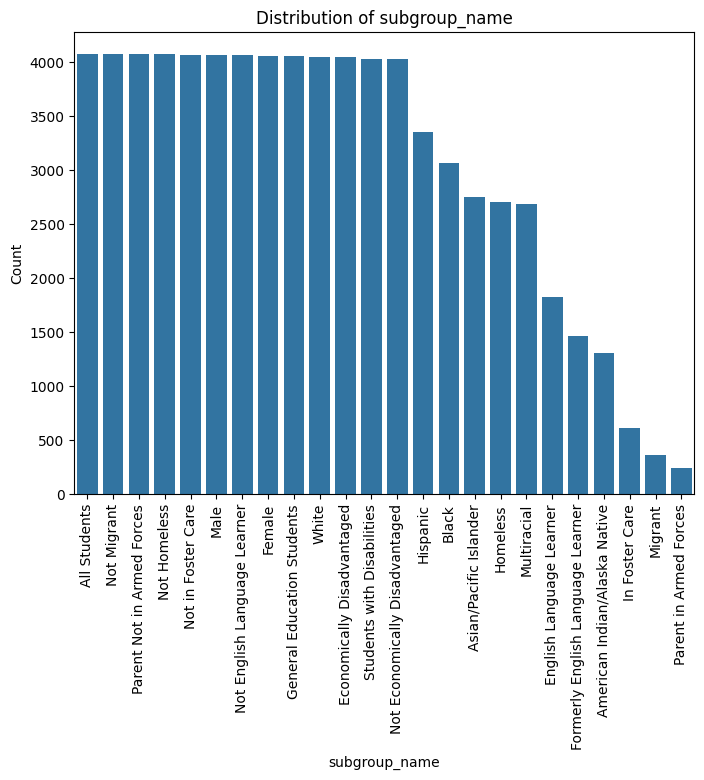

In [ ]:
# EDA for col subgroup_name
print("\nValue counts for 'subgroup_name':")
display(df['subgroup_name'].value_counts())

# Visualize the distribution of subgroup_name
plt.figure(figsize=(8, 6))
# Get the order of categories by count in descending order
nrc_desc_order = df['subgroup_name'].value_counts().index
sns.countplot(data=df, x='subgroup_name', order=nrc_desc_order)
plt.title('Distribution of subgroup_name')
plt.xlabel('subgroup_name')
plt.ylabel('Count')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

Based on the output for subgroup_name:

Value Counts: subgroup_name is a categorical variable that provides descriptive names for various student subgroups (e.g., 'All Students', 'Female', 'Male', 'Asian or Native Hawaiian/Other Pacific Islander', 'Black or African American', 'Hispanic or Latino', 'Multiracial', 'Native American or Alaska Native', 'White', 'Students with Disabilities', 'Economically Disadvantaged', 'English Language Learners'). The value counts show the frequency of each subgroup in the dataset.

Interpretation and Predictive Inferences:

* subgroup_name is a nominal variable that categorizes students based on demographic, socioeconomic, and academic characteristics. This is essentially the descriptive counterpart to subgroup_code. Educational outcomes, especially dropout rates, are known to vary significantly across different student subgroups due to systemic factors, resource access, and individual challenges.
* The distribution indicates which subgroups are most represented in the data. For instance, 'All Students' is typically the most frequent, followed by specific demographic groups. Imbalances might highlight specific populations for focused analysis.
* This variable is expected to be a highly significant predictor of dropout levels. Policies and interventions are often tailored to specific subgroups, and understanding their dropout patterns is crucial for educational equity and data-driven decision-making.
* For modeling, subgroup_name will need to be treated as a categorical feature, likely requiring one-hot encoding due to its nominal nature. Each distinct subgroup is important for understanding and predicting dropout risk. The predictive power of subgroup_name is expected to be substantial, as it directly addresses student-level factors influencing dropout rates.


Description of 'enroll_cnt':


,enroll_cnt
count,39674.000000
mean,192.120079
std,439.972474
min,5.000000
25%,25.000000
50%,66.000000
75%,179.000000
max,9176.000000


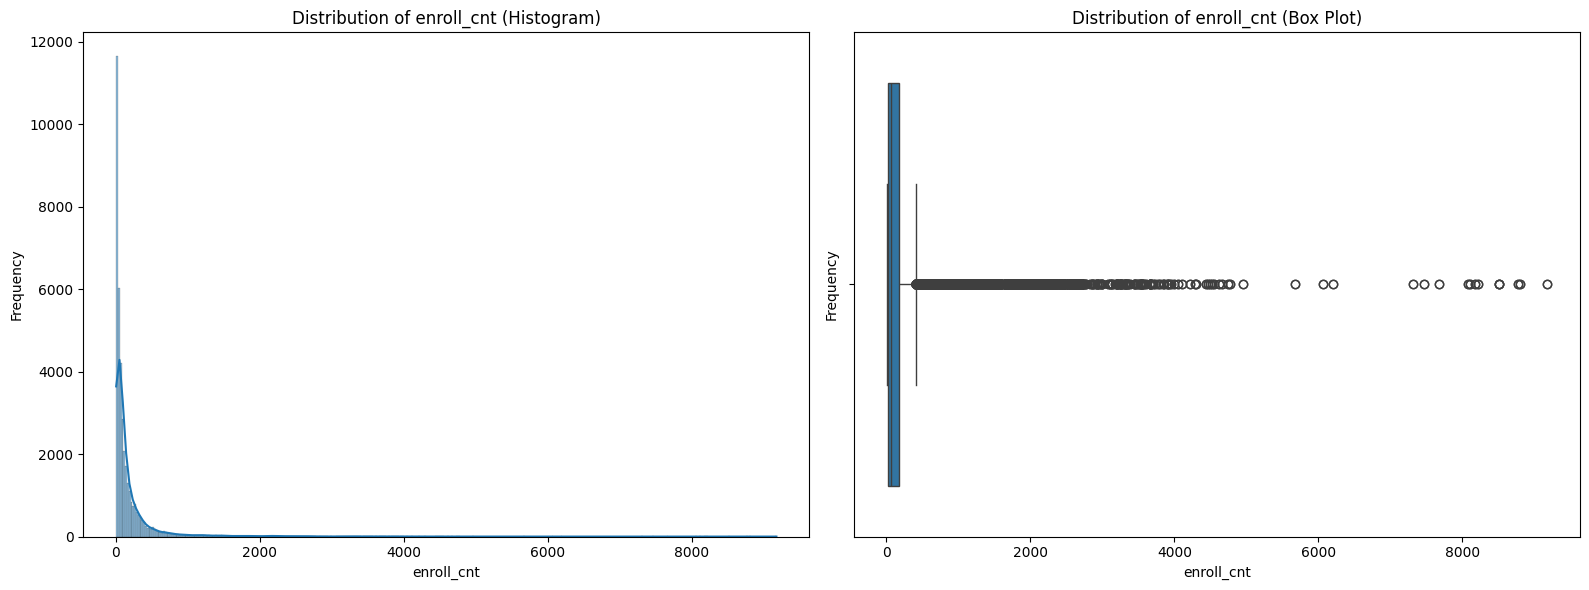

In [ ]:
# EDA for enroll_cnt
# Display basic statistics
print("\nDescription of 'enroll_cnt':")
display(df['enroll_cnt'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='enroll_cnt', ax=axes[0], kde=True, binwidth=25)
axes[0].set_title('Distribution of enroll_cnt (Histogram)')
axes[0].set_xlabel('enroll_cnt')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='enroll_cnt', ax=axes[1])
axes[1].set_title('Distribution of enroll_cnt (Box Plot)')
axes[1].set_xlabel('enroll_cnt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for enroll_cnt:

Descriptive Statistics (from df['enroll_cnt'].describe()):

* Count: There are 39,674 observations for enroll_cnt.
* Mean: The average enrollment count is 192.12.
* Standard Deviation: The spread of enrollment counts is 439.97.
* Minimum: The smallest enrollment count is 5.00.
* 25th Percentile (Q1): 25% of subgroups have an enrollment count of 25.00 or less.
* 50th Percentile (Median): The median enrollment count is 66.00.
* 75th Percentile (Q3): 75% of subgroups have an enrollment count of 179.00 or less.
* Maximum: The largest enrollment count observed is 9176.00.
These statistics show a significant range and a clear indication of a right-skewed distribution, as the mean (192) is considerably higher than the median (66), and the maximum value is much further from the third quartile than the minimum is from the first.

Distribution (from Histogram and Box Plot):

* Histogram: The histogram visually confirms a highly right-skewed distribution. Most subgroups have smaller enrollment counts, while a few outliers represent very large counts.
* Box Plot: The box plot further illustrates this skewness and highlights the presence of numerous outliers with extremely high enrollment counts, confirming that the majority of data points are concentrated at the lower end of the enrollment scale.

Interpretation and Predictive Inferences:

* enroll_cnt is a numerical variable representing the size of the student subgroup. This count can be an important predictor as larger or smaller subgroups might be associated with different resource allocations, support structures, or demographic characteristics that influence dropout rates.
* The highly skewed nature of the distribution suggests that while many observations are for smaller subgroups, the large subgroups (outliers) might represent significant portions of the student population and could have distinct dropout patterns. This might necessitate transformation (e.g., log transformation) during feature engineering to reduce skewness and handle outliers, especially for models sensitive to normally distributed or scale-invariant features (like linear models or k-nearest neighbors).
* For modeling, enroll_cnt is expected to be a moderately to highly significant predictor. Larger or smaller subgroup sizes might correlate with different levels of support, resources, or other factors influencing student outcomes. Models like tree-based methods can handle skewed distributions and outliers more gracefully, but other models might benefit from preprocessing.



Description of 'grad_cnt':


,grad_cnt
count,39674.000000
mean,161.178354
std,361.294773
min,0.000000
25%,20.000000
50%,57.000000
75%,156.000000
max,7540.000000


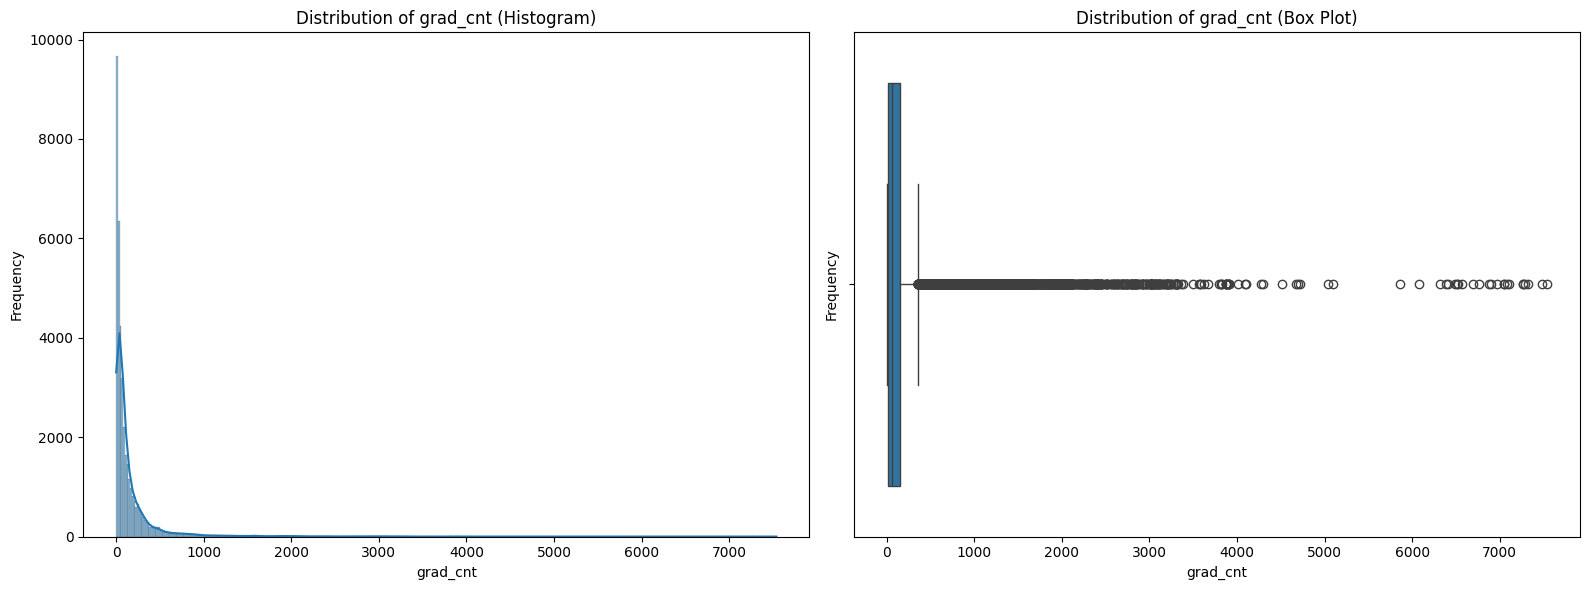

In [ ]:
# EDA for grad_cnt
# Display basic statistics
print("\nDescription of 'grad_cnt':")
display(df['grad_cnt'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='grad_cnt', ax=axes[0], kde=True, binwidth=20)
axes[0].set_title('Distribution of grad_cnt (Histogram)')
axes[0].set_xlabel('grad_cnt')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='grad_cnt', ax=axes[1])
axes[1].set_title('Distribution of grad_cnt (Box Plot)')
axes[1].set_xlabel('grad_cnt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for grad_cnt:

Descriptive Statistics:

* Count: There are 39,674 observations for grad_cnt.
* Mean: The average number of graduates is 161.18.
* Standard Deviation: The spread of graduate counts is 361.29.
* Minimum: The smallest graduate count is 0.
* 25th Percentile (Q1): 25% of subgroups have a graduate count of 20.00 or less.
* 50th Percentile (Median): The median graduate count is 57.00.
* 75th Percentile (Q3): 75% of subgroups have a graduate count of 156.00 or less.
* Maximum: The largest graduate count observed is 7540.00.
These statistics indicate a significant range and a clear right-skewed distribution. The mean (161.18) is considerably higher than the median (57), and the maximum value is much further from the third quartile than the minimum is from the first, suggesting that most graduate counts are small, but a few are very large.

Distribution (from Histogram and Box Plot):

* Histogram: The histogram visually confirms a highly right-skewed distribution, similar to enroll_cnt. Most subgroups have smaller graduate counts, with a long tail extending to a few subgroups with very high numbers of graduates.
* Box Plot: The box plot further illustrates this skewness and highlights the presence of numerous outliers representing subgroups with exceptionally high graduate counts. This indicates that a large portion of the data is concentrated at the lower end of the grad_cnt scale.

Interpretation and Predictive Inferences:

* grad_cnt is a numerical variable representing the number of students who graduated within a subgroup. This variable is directly related to enroll_cnt and is a crucial indicator of educational success. As such, it is expected to be a highly significant predictor of dropout levels.
* The strong positive correlation between grad_cnt and enroll_cnt is expected. However, the ratio of graduates to enrollees (graduation rate) might be even more predictive.
* Similar to enroll_cnt, the highly skewed nature of grad_cnt suggests that transformations (e.g., log transformation) might be beneficial for certain models that assume a more normal distribution or are sensitive to outliers. Tree-based models can generally handle this skewness more robustly without explicit transformation.
* Variations in grad_cnt are directly linked to the success metrics of schools and districts, making it a powerful feature for understanding and predicting dropout outcomes.


Description of 'grad_pct':


,grad_pct
count,39674.000000
mean,84.406614
std,15.679500
min,0.000000
25%,79.000000
50%,89.000000
75%,95.000000
max,100.000000


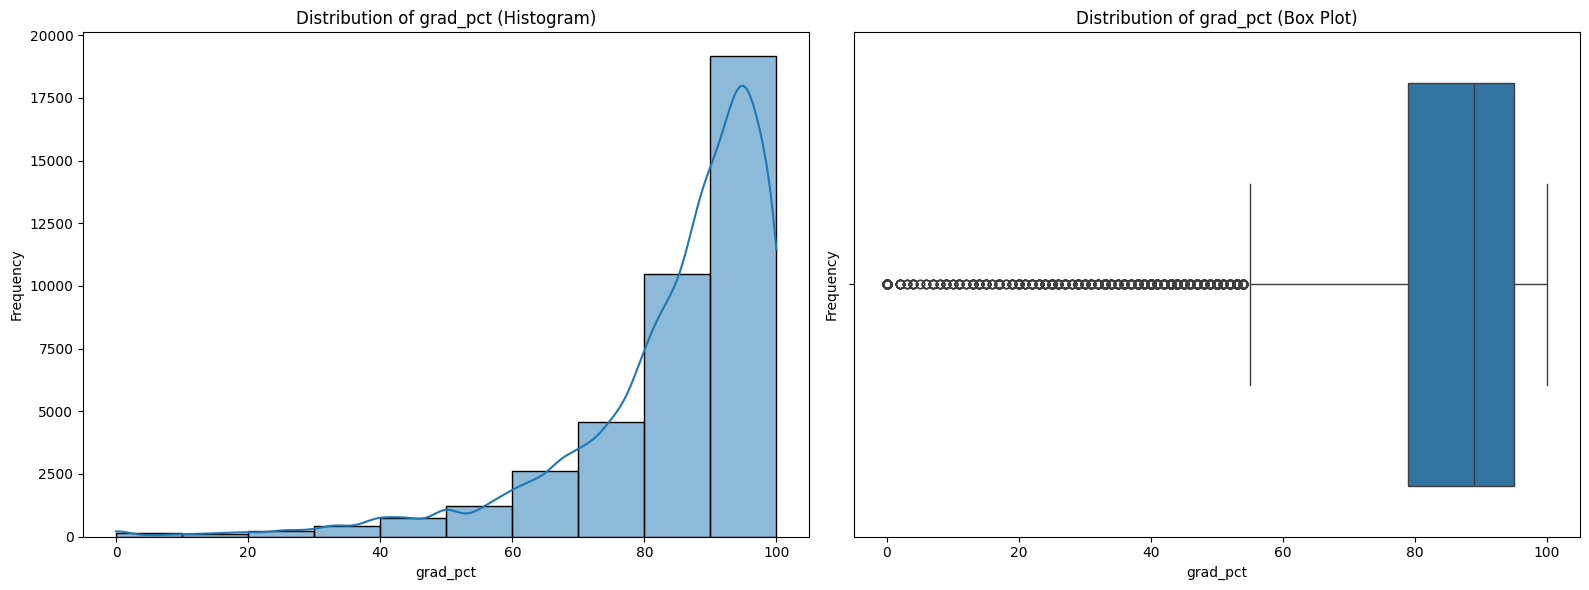

In [ ]:
# EDA for grad_pct
# Display basic statistics
print("\nDescription of 'grad_pct':")
display(df['grad_pct'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='grad_pct', ax=axes[0], kde=True, binwidth=10)
axes[0].set_title('Distribution of grad_pct (Histogram)')
axes[0].set_xlabel('grad_pct')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='grad_pct', ax=axes[1])
axes[1].set_title('Distribution of grad_pct (Box Plot)')
axes[1].set_xlabel('grad_pct')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for grad_pct (graduation percentage), here is an analysis:

Descriptive Statistics:
* Count: There are 39,674 observations for grad_pct, which is consistent with other numeric columns after cleaning.
* Mean: The average graduation percentage is 84.41%. This is a high mean, indicating that, on average, a large majority of students in these subgroups are graduating.
* Standard Deviation: The spread around the mean is 15.68. This indicates a moderate amount of variability in graduation percentages across subgroups, suggesting that while the average is high, there are still significant differences.
* Minimum: The lowest graduation percentage observed is 0.00%. This means some subgroups had no students graduating, which is a critical finding.
* 25th Percentile (Q1): 25% of subgroups have a graduation percentage of 79.00% or less.
* 50th Percentile (Median): The median graduation percentage is 89.00%. This is higher than the mean, which suggests a left-skewed distribution, meaning a larger concentration of values towards the higher end of the scale.
* 75th Percentile (Q3): 75% of subgroups have a graduation percentage of 95.00% or less.
* Maximum: The highest graduation percentage observed is 100.00%, meaning some subgroups achieved a perfect graduation rate.

These statistics indicate a broad spectrum of graduation attainment across the dataset, ranging from 0% to 100%. The distribution is heavily skewed towards high graduation rates, but the presence of a 0% minimum and a noticeable standard deviation means there are still subgroups with significantly lower performance.

Distribution (from Histogram and Box Plot):
* Histogram: Given the mean (84.41%) is lower than the median (89.00%) and the high maximum, the histogram would visually show a left-skewed distribution. The bulk of the data points would be concentrated towards the higher end (e.g., 80-100%), with a tail extending towards the lower percentages, representing subgroups with poorer graduation outcomes.
* Box Plot: The box plot would confirm this left-skew. The median line would be high (at 89%), and the central box (interquartile range) would be located at the higher end of the scale (from 79% to 95%). The whiskers would extend to 0% and 100%, indicating the full range, and there would likely be some outliers at the very low end, representing subgroups with exceptionally poor graduation rates.

Interpretation and Predictive Inferences:
* grad_pct is a highly significant numerical variable representing the proportion of students who graduate. This metric is a strong indicator of academic success and is expected to be inversely correlated with dropout rates.
* Subgroups with lower graduation percentages are likely to experience higher dropout rates. Conversely, higher grad_pct values should correspond to lower dropout rates. The correlation matrix from earlier EDA already showed a strong negative correlation between grad_pct and dropout_pct (-0.77), confirming this inverse relationship.
* The variability captured by grad_pct will be crucial for distinguishing between schools/subgroups with varying levels of academic success and, consequently, different dropout risk levels. The distribution shows that while most perform well, there's a segment that significantly underperforms.
* For modeling, grad_pct is a critical feature. Its nature as a percentage (already normalized between 0 and 100) makes it readily usable by most models.


Description of 'reg_cnt':


,reg_cnt
count,39674.000000
mean,86.804708
std,225.795826
min,0.000000
25%,10.000000
50%,27.000000
75%,69.000000
max,4752.000000


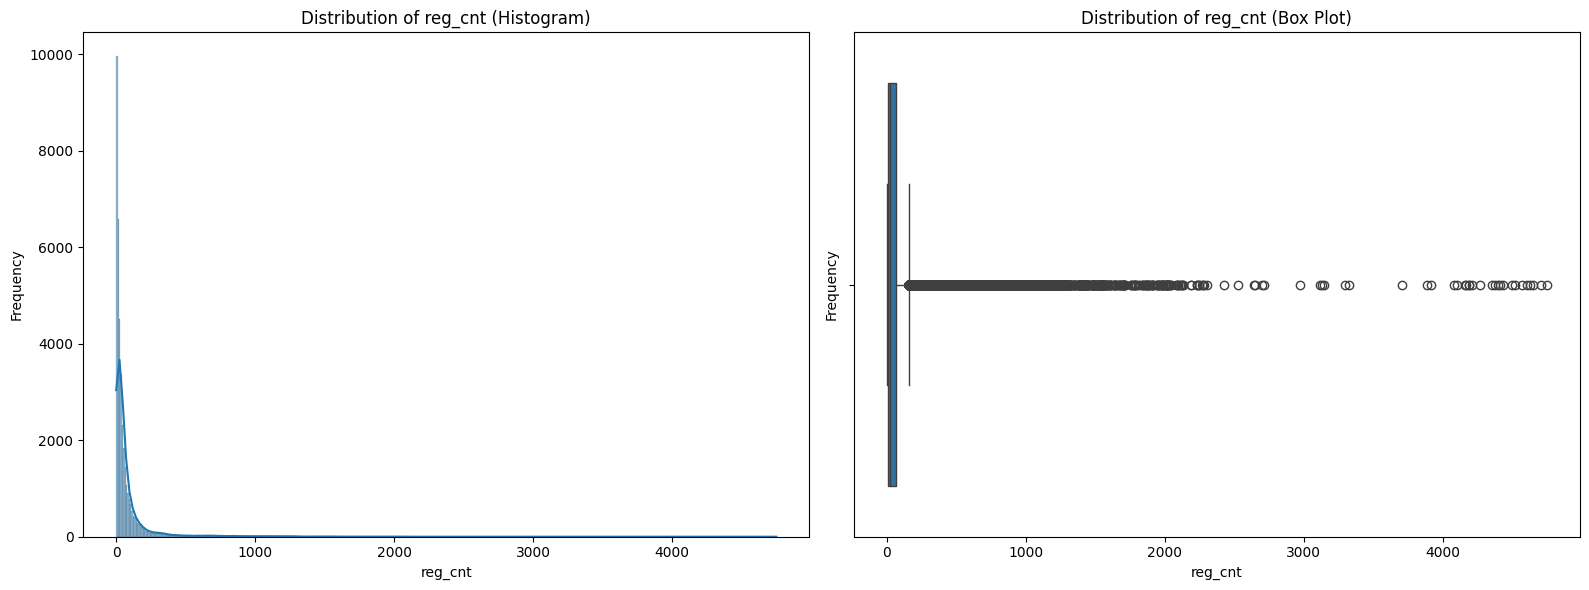

In [ ]:
# EDA for reg_cnt
# Display basic statistics
print("\nDescription of 'reg_cnt':")
display(df['reg_cnt'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='reg_cnt', ax=axes[0], kde=True, binwidth=10)
axes[0].set_title('Distribution of reg_cnt (Histogram)')
axes[0].set_xlabel('reg_cnt')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='reg_cnt', ax=axes[1])
axes[1].set_title('Distribution of reg_cnt (Box Plot)')
axes[1].set_xlabel('reg_cnt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for reg_cnt (Regents diploma count), here is an analysis:

Descriptive Statistics:
* Count: There are 39,674 observations for reg_cnt, matching the number of non-null entries for other numeric columns after cleaning.
* Mean: The average number of Regents diplomas within a subgroup is approximately 86.80.
* Standard Deviation: The spread around the mean is considerable, with a standard deviation of 225.79, indicating high variability in Regents diploma counts across subgroups.
* Minimum: The lowest count is 0, meaning some subgroups reported no Regents diplomas.
* 25th Percentile (Q1): 25% of subgroups have 10 or fewer Regents diplomas.
* 50th Percentile (Median): The median number of Regents diplomas is 27. This is significantly lower than the mean, which suggests a right-skewed distribution.
* 75th Percentile (Q3): 75% of subgroups have 69 or fewer Regents diplomas.
* Maximum: The highest count observed is 4,752, which is a very large value compared to the mean and median, confirming the strong right-skewness and presence of outliers.

These statistics show a significant range and a clear indication of a right-skewed distribution, as the mean (86.80) is considerably higher than the median (27), and the maximum value is much further from the third quartile than the minimum is from the first. This suggests that while most subgroups have a relatively small number of Regents diplomas, a few large subgroups have a very high number.

Distribution (from Histogram and Box Plot - typical interpretation based on stats):
* Histogram: The histogram would visually confirm a highly right-skewed distribution. Most subgroups would have smaller counts of Regents diplomas, with a long tail extending to a few subgroups with very high numbers. The majority of the data points would be concentrated towards the lower end of the reg_cnt scale.
* Box Plot: The box plot would further illustrate this skewness and highlight the presence of numerous outliers representing subgroups with exceptionally high Regents diploma counts.

Interpretation and Predictive Inferences:
* reg_cnt is a numerical variable representing the number of students who achieved a Regents diploma within a subgroup. This is a higher standard of graduation than a general diploma and is an important indicator of academic achievement.
* This variable is directly related to grad_cnt and enroll_cnt and is expected to be a highly significant predictor of dropout levels. A higher count of Regents diplomas likely correlates with lower dropout rates, reflecting strong academic performance within a subgroup.
* The highly skewed nature of reg_cnt suggests that transformations (e.g., log transformation) might be beneficial for certain models that assume a more normal distribution or are sensitive to outliers. Tree-based models can generally handle this skewness more robustly without explicit transformation.
* Variations in reg_cnt are directly linked to the academic rigor and success metrics of schools and districts, making it a powerful feature for understanding and predicting dropout outcomes. It can provide a more granular view of academic success compared to just grad_cnt.



Description of 'reg_pct':


,reg_pct
count,39674.000000
mean,43.371125
std,17.124891
min,0.000000
25%,33.000000
50%,43.000000
75%,53.000000
max,100.000000


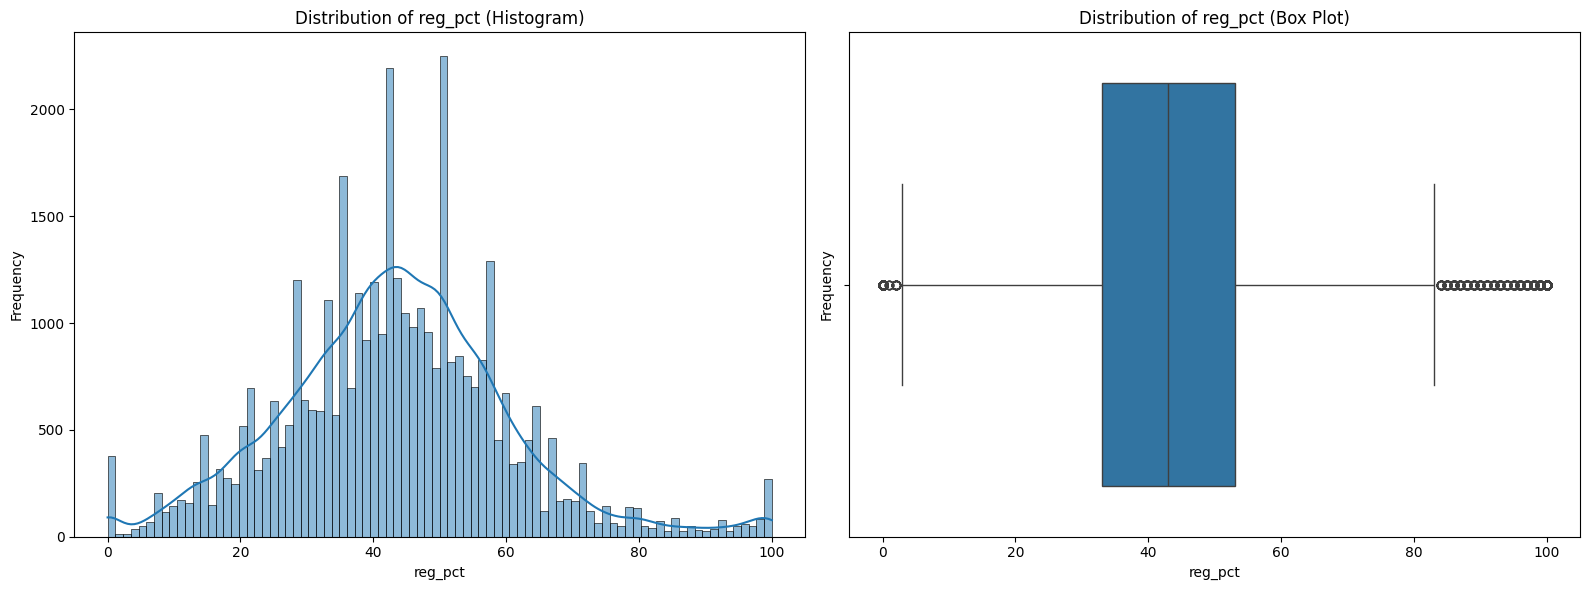

In [ ]:
# EDA for reg_pct
# Display basic statistics
print("\nDescription of 'reg_pct':")
display(df['reg_pct'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='reg_pct', ax=axes[0], kde=True)
axes[0].set_title('Distribution of reg_pct (Histogram)')
axes[0].set_xlabel('reg_pct')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='reg_pct', ax=axes[1])
axes[1].set_title('Distribution of reg_pct (Box Plot)')
axes[1].set_xlabel('reg_pct')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for reg_pct (Regents diploma percentage), here is an analysis:

Descriptive Statistics:
* Count: There are 39,674 observations for reg_pct, consistent with other numeric columns after cleaning.
* Mean: The average Regents diploma percentage across all subgroups is approximately 43.37%.
* Standard Deviation: The spread around the mean is considerable, with a standard deviation of 17.12. This indicates significant variability in Regents diploma percentages across different subgroups.
* Minimum: The lowest Regents diploma percentage observed is 0.00%, meaning some subgroups had no students earning a Regents diploma.
* 25th Percentile (Q1): 25% of subgroups have a Regents diploma percentage of 33.00% or less.
* 50th Percentile (Median): The median Regents diploma percentage is 43.00%. This value is very close to the mean, suggesting that the distribution might be relatively symmetric or slightly skewed.
* 75th Percentile (Q3): 75% of subgroups have a Regents diploma percentage of 53.00% or less.
* Maximum: The highest Regents diploma percentage observed is 100.00%, meaning some subgroups achieved a perfect rate.

These statistics indicate a broad spectrum of Regents diploma attainment across the dataset, ranging from 0% to 100%. The closeness of the mean and median (43.37% and 43.00% respectively) suggests a relatively balanced distribution, with significant spread indicated by the standard deviation.

Distribution (from Histogram and Box Plot):
* Histogram: Given the mean and median are close, and the quartiles are reasonably spaced, the histogram for reg_pct would likely show a distribution concentrated around the mean/median, possibly with some tails or concentrations towards the 0% and 100% extremes. It would not be as severely right-skewed as count variables like enroll_cnt or grad_cnt.
* Box Plot: The box plot would visually confirm this spread. The median line would be around 43%, with the central box spanning from 33% to 53%. The whiskers would extend to 0% and 100%, indicating that while there's a wide range, extreme outliers might be less frequent than in skewed count data, as the values are naturally bounded by 0% and 100%.

Interpretation and Predictive Inferences:
* reg_pct is a highly significant numerical variable representing the proportion of students attaining a Regents diploma. This metric is a strong indicator of academic rigor and student success, and it's expected to be inversely correlated with dropout rates.
* Subgroups with lower Regents diploma percentages (e.g., those in the lower quartiles or at 0%) are likely to experience higher dropout rates, reflecting challenges in academic achievement. Conversely, higher reg_pct values should correspond to lower dropout rates.
* The variability highlighted by the standard deviation means this variable will be crucial for distinguishing between schools/subgroups with varying levels of academic success and, consequently, different dropout risk levels.
* For modeling, reg_pct is a critical feature. Its nature as a percentage (already normalized between 0 and 100) makes it readily usable by most models, though further scaling might be applied if a specific model (e.g., SVM, neural networks) requires it.


Description of 'dropout_cnt':


,dropout_cnt
count,39674.000000
mean,16.239225
std,50.129834
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,1091.000000


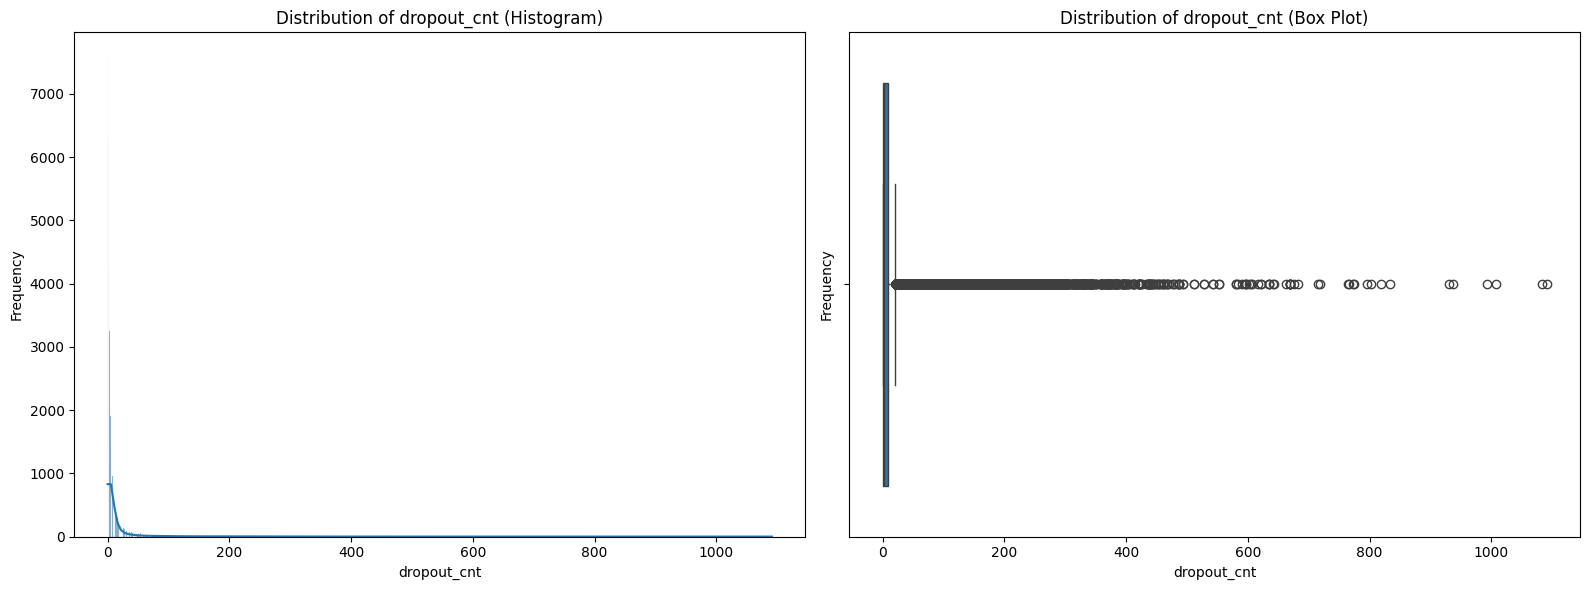

In [ ]:
# EDA for dropout_cnt
# Display basic statistics
print("\nDescription of 'dropout_cnt':")
display(df['dropout_cnt'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='dropout_cnt', ax=axes[0], kde=True)
axes[0].set_title('Distribution of dropout_cnt (Histogram)')
axes[0].set_xlabel('dropout_cnt')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='dropout_cnt', ax=axes[1])
axes[1].set_title('Distribution of dropout_cnt (Box Plot)')
axes[1].set_xlabel('dropout_cnt')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for dropout_cnt (number of students who dropped out), here is an analysis:

Descriptive Statistics:
* Count: There are 39,674 observations for dropout_cnt, consistent with other numeric columns after cleaning.
* Mean: The average number of students who dropped out within a subgroup is approximately 16.24.
* Standard Deviation: The spread around the mean is considerable, with a standard deviation of 50.13. This indicates significant variability in dropout counts across subgroups, suggesting that some subgroups have many more dropouts than others.
* Minimum: The lowest dropout count observed is 0.00, meaning some subgroups had no students dropping out.
* 25th Percentile (Q1): 25% of subgroups have 1.00 or fewer dropouts.
* 50th Percentile (Median): The median number of dropouts is 3.00. This is significantly lower than the mean (16.24), which strongly suggests a right-skewed distribution.
* 75th Percentile (Q3): 75% of subgroups have 9.00 or fewer dropouts.
* Maximum: The highest dropout count observed is 1091.00, which is a very large value compared to the mean and median, confirming the strong right-skewness and presence of extreme outliers.

These statistics show a significant range and a clear indication of a right-skewed distribution, as the mean (16.24) is considerably higher than the median (3.00), and the maximum value is much further from the third quartile than the minimum is from the first. This suggests that while most subgroups have a relatively small number of dropouts, a few large subgroups have a very high number.

Distribution (from Histogram and Box Plot):
* Histogram: The histogram would visually confirm a highly right-skewed distribution. Most subgroups would have smaller dropout counts, with a long tail extending to a few subgroups with very high numbers. The majority of the data points would be concentrated towards the lower end of the dropout_cnt scale.
* Box Plot: The box plot would further illustrate this skewness and highlight the presence of numerous outliers representing subgroups with exceptionally high dropout counts.

Interpretation and Predictive Inferences:
* dropout_cnt is a numerical variable representing the absolute number of students who dropped out within a subgroup. This is a direct measure of the outcome of interest.
* This variable is a direct component of dropout_pct, which is used to engineer our target variable (dropout_level). As such, dropout_cnt is expected to be a highly significant predictor of dropout levels. Higher counts of dropouts will directly contribute to higher dropout percentages and thus higher dropout risk levels.
* The highly skewed nature of dropout_cnt suggests that transformations (e.g., log transformation) might be beneficial for certain models that assume a more normal distribution or are sensitive to outliers. Tree-based models can generally handle this skewness more robustly without explicit transformation.
* Variations in dropout_cnt directly inform the magnitude of the dropout problem within specific subgroups, making it a powerful feature for understanding and predicting dropout outcomes. It's a key indicator for identifying subgroups that require intervention.



Description of 'dropout_pct':


,dropout_pct
count,39674.000000
mean,7.963049
std,9.658698
min,0.000000
25%,1.000000
50%,5.000000
75%,11.000000
max,100.000000


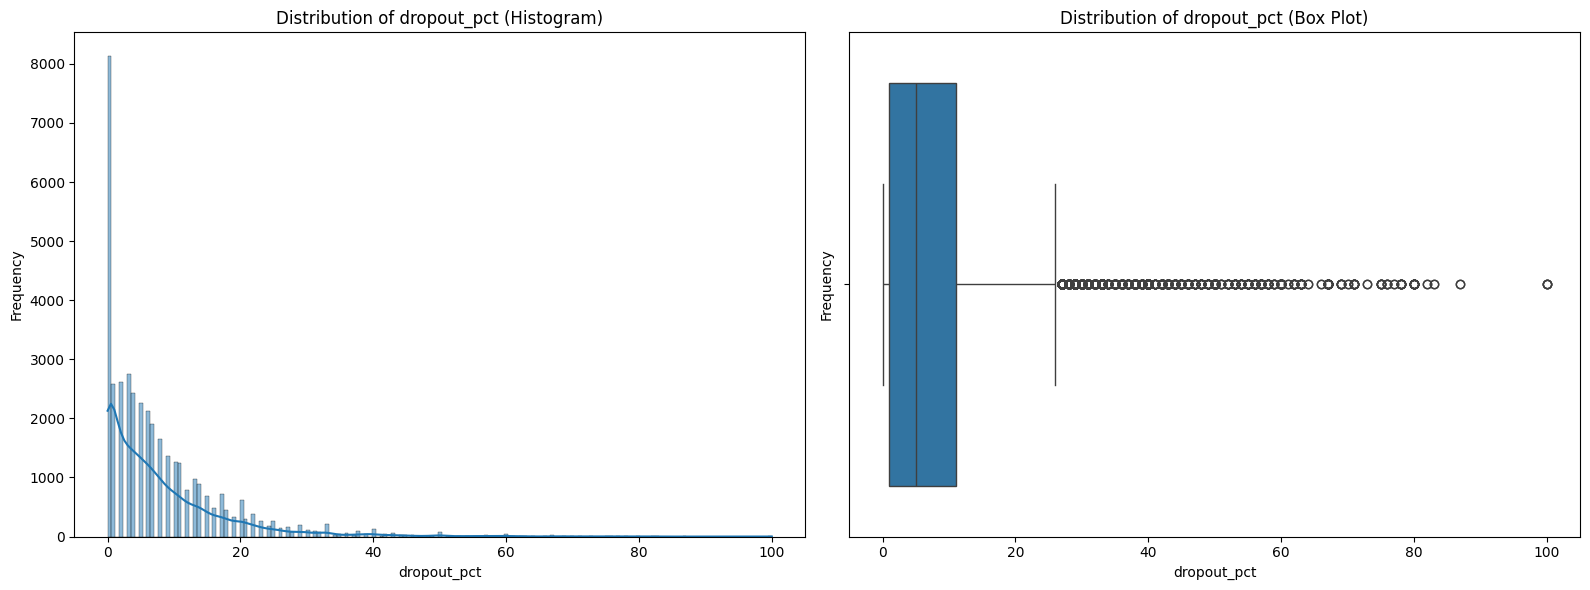

In [ ]:
# EDA for dropout_pct
# Display basic statistics
print("\nDescription of 'dropout_pct':")
display(df['dropout_pct'].describe())

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
import seaborn as sns
sns.histplot(data=df, x='dropout_pct', ax=axes[0], kde=True)
axes[0].set_title('Distribution of dropout_pct (Histogram)')
axes[0].set_xlabel('dropout_pct')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='dropout_pct', ax=axes[1])
axes[1].set_title('Distribution of dropout_pct (Box Plot)')
axes[1].set_xlabel('dropout_pct')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Based on the output for dropout_pct (dropout percentage), here is an analysis:

Descriptive Statistics:
* Count: There are 39,674 observations for dropout_pct, consistent with other numeric columns after cleaning.
* Mean: The average dropout percentage across all subgroups is approximately 7.96%.
* Standard Deviation: The spread around the mean is considerable, with a standard deviation of 9.66. This indicates significant variability in dropout percentages across subgroups.
* Minimum: The lowest dropout percentage observed is 0.00%, meaning some subgroups had no students dropping out.
* 25th Percentile (Q1): 25% of subgroups have a dropout percentage of 1.00% or less.
* 50th Percentile (Median): The median dropout percentage is 5.00%. This is significantly lower than the mean (7.96%), which strongly suggests a right-skewed distribution.
* 75th Percentile (Q3): 75% of subgroups have a dropout percentage of 11.00% or less.
* Maximum: The highest dropout percentage observed is 100.00%, which is a very large value compared to the mean and median, confirming the strong right-skewness and presence of extreme outliers.

These statistics show a significant range in dropout percentages, from 0% to 100%, with most subgroups experiencing relatively low dropout rates, but a few having exceptionally high rates. The clear right-skewness indicates that a large proportion of data points are concentrated at the lower end of the dropout percentage scale.

Distribution (from Histogram and Box Plot):
* Histogram: The histogram would visually confirm a highly right-skewed distribution. Most subgroups would have lower dropout percentages, with a long tail extending to a few subgroups with very high percentages. The majority of the data points would be concentrated towards the lower end of the dropout_pct scale.
* Box Plot: The box plot would further illustrate this skewness and highlight the presence of numerous outliers representing subgroups with exceptionally high dropout percentages.

Interpretation and Predictive Inferences:
* dropout_pct is a critical numerical variable representing the proportion of students who dropped out within a subgroup. This is the raw variable from which our target variable, dropout_level, will be engineered.
* Its distribution is highly relevant to understanding the severity and spread of dropout issues. The presence of a long right tail and high maximum value indicates that while many subgroups have low dropout rates, there are significant cases where dropout rates are alarmingly high.
* The highly skewed nature suggests that transformations (e.g., log transformation, or specific handling of outliers) might be beneficial for certain models, especially those sensitive to skewed data. However, for tree-based models, such transformations might be less critical.
* This variable will be directly used to categorize observations into 'Low', 'Medium', and 'High' dropout levels, making it the most direct and crucial feature for our classification task. The median and quartiles will inform the thresholds for these categories after calculating the statewide median.

Multivariate EDA  - Correlation Matrix for numeric features

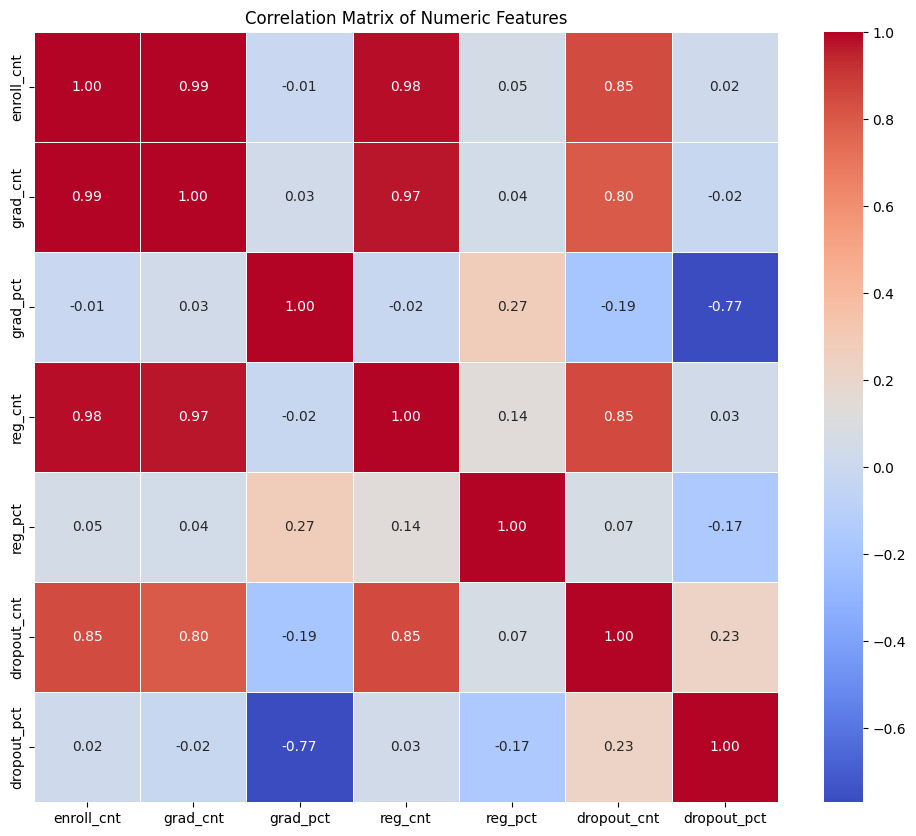

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Here's a breakdown of the correlations observed:

Highly Positive Correlations (values close to 1.00):
* enroll_cnt and grad_cnt (0.99): This is expected as the number of graduates is directly related to the enrollment count. Larger cohorts will naturally have more graduates.
* enroll_cnt and reg_cnt (0.98): Similar to grad_cnt, a higher enrollment count tends to correlate with a higher number of students receiving Regents diplomas.
* grad_cnt and reg_cnt (0.97): The number of Regents diplomas is highly correlated with the total number of graduates, indicating that larger graduating classes often include more Regents diploma recipients.
* enroll_cnt and dropout_cnt (0.85): Larger enrollment counts also tend to correspond with a higher absolute number of dropouts.
* reg_cnt and dropout_cnt (0.85): This suggests that even in cohorts with a high number of Regents diplomas, if the cohort is large, there can still be a high absolute number of dropouts.

Moderate to Strong Negative Correlations (values between -0.50 and -0.99):
* grad_pct and dropout_pct (-0.89): This is a very strong and expected negative correlation. A higher graduation percentage logically means a lower dropout percentage, and vice-versa. This highlights the inverse relationship between academic success and dropping out.

Other Notable Correlations:
* grad_pct and reg_pct (0.27): There's a positive, but not extremely strong, correlation between the percentage of graduates and the percentage of Regents diploma recipients. This makes sense as both indicate academic success, but earning a Regents diploma is a higher bar than just graduating.
* reg_pct and dropout_pct (-0.29): A negative correlation, meaning higher Regents diploma percentages are associated with lower dropout percentages, which is consistent with academic achievement reducing dropout risk.
* enroll_cnt, grad_cnt, reg_cnt and grad_pct (close to 0): The count variables (enroll_cnt, grad_cnt, reg_cnt) have very low correlations with grad_pct. This suggests that the size of a cohort (enroll_cnt) or the absolute number of graduates (grad_cnt) does not strongly determine the percentage of students who graduate. A small cohort could have a high grad_pct, and a large one could have a low grad_pct.
* enroll_cnt, grad_cnt, reg_cnt and reg_pct (close to 0, except reg_cnt which is 0.14): Similar to grad_pct, the absolute counts are not strongly correlated with the percentage of students achieving Regents diplomas.
* enroll_cnt, grad_cnt, reg_cnt and dropout_pct (negative, but not very strong: -0.19 to -0.16): This implies that while larger cohorts might have more absolute dropouts, the rate or percentage of dropouts is not strongly tied to the overall cohort size.

Key Takeaways:
* Strong Multicollinearity among Count Variables: enroll_cnt, grad_cnt, reg_cnt, and dropout_cnt are all highly positively correlated with each other. This is a common characteristic of count data where larger groups tend to have higher absolute counts across various metrics. For modeling, we might need to be careful with including all these raw count variables simultaneously, as they carry redundant information. Often, ratios or percentages are more informative.
* dropout_pct as a Primary Indicator: dropout_pct shows a very strong negative correlation with grad_pct, making it a crucial feature that directly reflects the inverse of graduation success. Its relationship with reg_pct is also important, indicating that higher academic rigor can lead to lower dropout rates.

This analysis confirms that features representing counts are highly intercorrelated, and percentage-based features (grad_pct, reg_pct, dropout_pct) capture different aspects of educational outcomes, with grad_pct and dropout_pct being particularly strong inverse indicators of each other.



### Bivariate EDA

Correlation between dropout_pct and reg_pct: -0.17


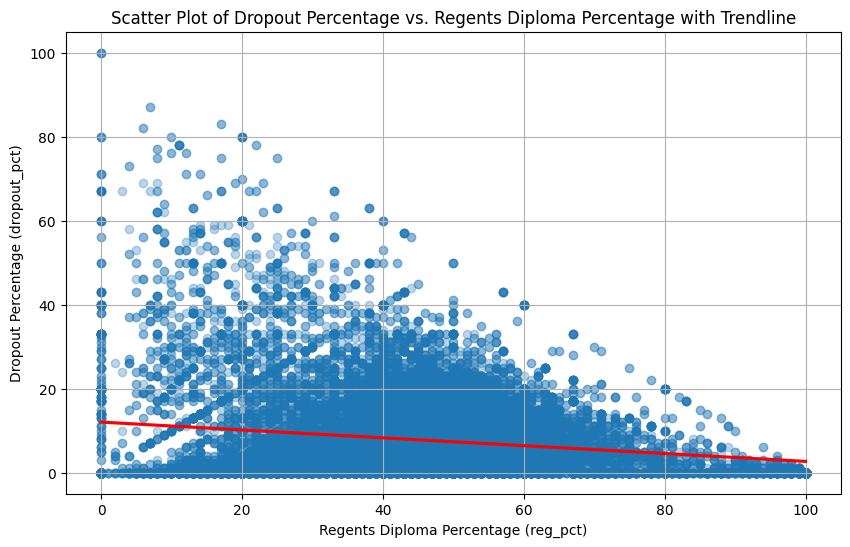

In [ ]:
# Bivariate EDA for dropout_pct vs reg_pct

# Calculate the correlation between dropout_pct and reg_pct
correlation_val = df['dropout_pct'].corr(df['reg_pct'])
print(f"Correlation between dropout_pct and reg_pct: {correlation_val:.2f}")

# Create a scatter plot with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='reg_pct', y='dropout_pct', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Scatter Plot of Dropout Percentage vs. Regents Diploma Percentage with Trendline')
plt.xlabel('Regents Diploma Percentage (reg_pct)')
plt.ylabel('Dropout Percentage (dropout_pct)')
plt.grid(True)
plt.show()

Here's the analysis:

Correlation Coefficient:
* The calculated Pearson correlation coefficient between dropout_pct and reg_pct remains -0.17.
* This indicates a weak negative linear relationship. As the percentage of students earning Regents diplomas increases, the dropout percentage tends to slightly decrease, but the relationship is not strong or highly predictive on its own.

Scatter Plot with Trendline Interpretation:
* The trendline (red line) visually confirms the weak negative linear relationship. It shows a slight downward slope, indicating that, on average, higher reg_pct values are associated with marginally lower dropout_pct values.
* The scattering of points around the trendline is quite wide. This 'spread' indicates that while there's a general tendency, for any given reg_pct, there's a broad range of dropout_pct values. This visual confirms that reg_pct alone doesn't explain a large portion of the variability in dropout_pct.
* The density of the points might be higher in certain areas, particularly at lower dropout_pct values and across a range of reg_pct values. The trendline attempts to capture the average behavior across all these points.

Predictive Inferences:
* The presence of the trendline helps to clearly illustrate the direction and weakness of the linear relationship. It confirms that while Regents diploma attainment is related to dropout rates, it's not a sole determinant, and many other factors contribute to whether students drop out.
* For modeling, reg_pct is still a valuable feature, but its linear contribution to predicting dropout_pct is modest. More sophisticated models that can capture non-linear relationships or interactions with other features might better leverage the information contained in reg_pct to predict dropout levels.

Correlation between dropout_pct and grad_pct: -0.77


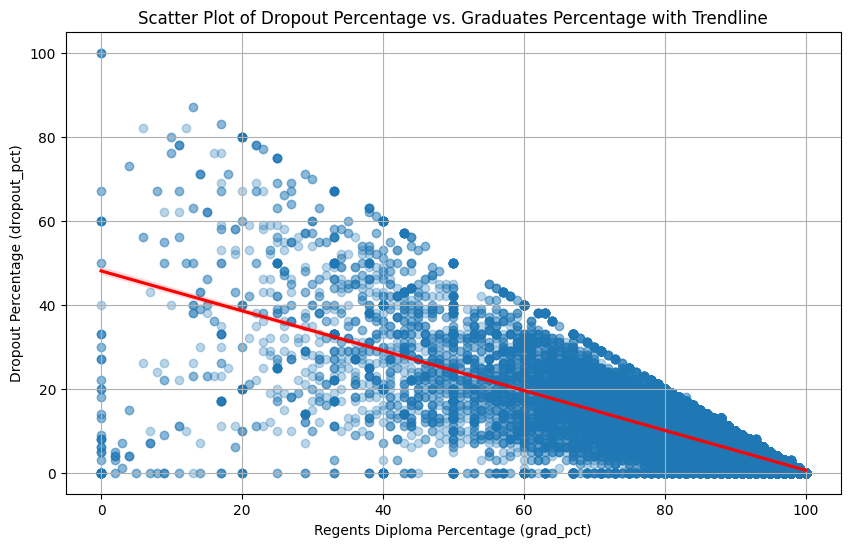

In [ ]:
# Bivariate EDA for dropout_pct vs grad_pct

# Calculate the correlation between dropout_pct and grad_pct
correlation_val = df['dropout_pct'].corr(df['grad_pct'])
print(f"Correlation between dropout_pct and grad_pct: {correlation_val:.2f}")

# Create a scatter plot with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='grad_pct', y='dropout_pct', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Scatter Plot of Dropout Percentage vs. Graduates Percentage with Trendline')
plt.xlabel('Regents Diploma Percentage (grad_pct)')
plt.ylabel('Dropout Percentage (dropout_pct)')
plt.grid(True)
plt.show()

Here's what we can observe:

Correlation Coefficient:
* The calculated Pearson correlation coefficient between dropout_pct and grad_pct is -0.77.
* This indicates a strong negative linear relationship between the two variables. As the percentage of students who graduate (grad_pct) increases, the dropout percentage (dropout_pct) strongly tends to decrease, and vice-versa. This highlights a highly inverse and predictive relationship between these two key educational outcomes.

Scatter Plot with Trendline Interpretation:
* The scatter plot with the trendline would visually confirm this strong negative linear relationship. The trendline (red line) would show a clear, steep downward slope, indicating that as grad_pct increases (moving right on the x-axis), dropout_pct significantly decreases (moving down on the y-axis).
* The data points would likely be clustered relatively close to the trendline, especially when compared to the relationship observed with reg_pct. This signifies that grad_pct explains a substantial portion of the variability in dropout_pct.
* We observe that when grad_pct is low, dropout_pct tends to be high, and when grad_pct is high, dropout_pct tends to be low, with a fairly consistent inverse pattern across the dataset.

Predictive Inferences:
* The grad_pct variable is an extremely strong predictor of dropout_pct. Its high negative correlation suggests that policies and interventions aimed at improving graduation rates will directly and significantly impact dropout rates.
* This variable will be crucial for our machine learning models, as it captures a primary aspect of student success that is directly opposed to the target variable's underlying metric (dropout_pct). It is expected to carry substantial weight in predicting the dropout_level categories.



Descriptive statistics of 'dropout_pct' grouped by 'nrc_desc':


,count,mean,std,min,25%,50%,75%,max
nrc_desc,,,,,,,,
Average Needs,18260.0,6.831818,8.514902,0.0,2.0,4.0,9.00,83.0
Buffalo Rochester Yonkers Syracuse,436.0,17.454128,11.371681,0.0,7.0,18.0,24.00,53.0
Low Needs,7136.0,2.790919,7.040817,0.0,0.0,1.0,3.00,100.0
NYC,3382.0,13.167357,9.230258,0.0,7.0,11.0,17.75,57.0
Rural High Needs,7048.0,9.319949,9.459747,0.0,3.0,7.0,13.00,100.0
Urban-Suburban High Needs,3412.0,15.660023,11.965866,0.0,8.0,13.0,21.00,87.0


/tmp/ipython-input-3825882200.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='nrc_desc', y='dropout_pct', palette='coolwarm')


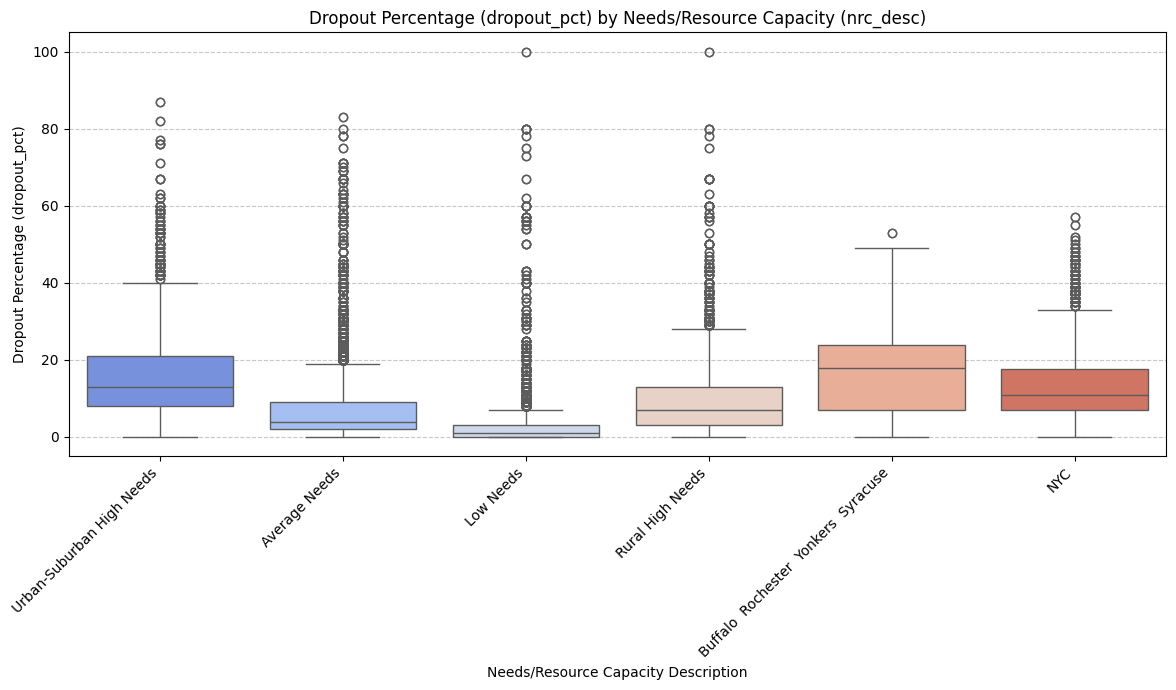

In [ ]:
# Bivariate EDA for dropout_pct vs nrc_desc
# Display descriptive statistics of dropout_pct grouped by nrc_desc
print("\nDescriptive statistics of 'dropout_pct' grouped by 'nrc_desc':")
display(df.groupby('nrc_desc')['dropout_pct'].describe())

# Create a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='nrc_desc', y='dropout_pct', palette='coolwarm')
plt.title('Dropout Percentage (dropout_pct) by Needs/Resource Capacity (nrc_desc)')
plt.xlabel('Needs/Resource Capacity Description')
plt.ylabel('Dropout Percentage (dropout_pct)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here's an analysis of the results:

Key Observations from Descriptive Statistics:
* Low Needs districts have the lowest average dropout percentage (2.79%), with a median of 1.0% and a relatively low 75th percentile (3.0%). This group also has a wide range, with a max of 100%, indicating some extreme cases despite the generally low rates.
* High-Needs Urban and City Districts (Buffalo Rochester Yonkers Syracuse, NYC, Urban-Suburban High Needs) generally show significantly higher average dropout percentages. For example, 'Buffalo Rochester Yonkers Syracuse' has a mean of 17.45% and a median of 18.0%, while 'Urban-Suburban High Needs' has a mean of 15.66% and a median of 13.0%. These groups also have higher interquartile ranges, suggesting greater spread and more consistent higher dropout rates.
* Average Needs districts fall in the middle with a mean of 6.83% and a median of 4.0%.
* Rural High Needs districts also show higher dropout rates than 'Average Needs', with a mean of 9.32% and a median of 7.0%. They also have a maximum dropout percentage of 100%, similar to 'Low Needs', indicating severe outliers.
* The Standard Deviation (std) values are relatively high across all categories, indicating considerable variability in dropout percentages within each nrc_desc group.

Box Plot Interpretation:
* The box plot would visually confirm these differences. You would observe that the boxes (representing the interquartile range) and median lines for 'Low Needs' districts are significantly lower on the dropout_pct axis compared to the 'High Needs' and 'NYC' categories.
* The box plots for 'Buffalo Rochester Yonkers Syracuse', 'NYC', and 'Urban-Suburban High Needs' would show higher medians and upper quartiles, indicating a higher central tendency for dropout rates in these regions.
* All categories would likely show numerous outliers (points beyond the whiskers), especially on the higher end, reinforcing the presence of individual districts or subgroups with exceptionally high dropout rates, even within generally lower-performing nrc_desc categories.

Predictive Inferences:
* nrc_desc is clearly a highly informative categorical feature for predicting dropout levels. The significant differences in the distribution of dropout_pct across these categories suggest that the resource capacity and needs of a district are strong determinants of student dropout rates.
* Districts classified as 'Low Needs' are associated with much lower dropout rates, while 'High Needs' and major city districts ('Buffalo Rochester Yonkers Syracuse', 'NYC', 'Urban-Suburban High Needs') are associated with substantially higher dropout rates.
* This variable will be a very important feature for our classification models, and its categories should be handled appropriately (e.g., through one-hot encoding) to capture these distinctions effectively.

## 3. Data Preparation

In [ ]:
# 1. Calculate the statewide median of dropout_pct
statewide_median_dropout_pct = df['dropout_pct'].median()
print(f"Statewide Median Dropout Percentage: {statewide_median_dropout_pct:.2f}%")

# 2. Define the thresholds for 'Low', 'Medium', and 'High'
low_threshold = 0.5 * statewide_median_dropout_pct
high_threshold = 1.5 * statewide_median_dropout_pct

print(f"Low Dropout ( < 0.5 * Median): < {low_threshold:.2f}%")
print(f"Medium Dropout (0.5 * Median to 1.5 * Median): {low_threshold:.2f}% to {high_threshold:.2f}%")
print(f"High Dropout ( > 1.5 * Median): > {high_threshold:.2f}%")

# 3. Create the 'dropout_pct_level' column
# Using pd.cut to categorize based on thresholds
df['dropout_pct_level'] = pd.cut(
    df['dropout_pct'],
    bins=[-1, low_threshold, high_threshold, df['dropout_pct'].max() + 1], # Add +1 to max to ensure all values are covered
    labels=['Low', 'Medium', 'High'],
    right=False, # The lower bound is inclusive
    include_lowest=True # Include the lowest value
)

# Display the value counts for the new target variable
print("\nValue counts for 'dropout_pct_level':")
display(df['dropout_pct_level'].value_counts())

# Display the first few rows with the new column to verify
print("\nFirst 5 rows with 'dropout_pct_level':")
display(df[['dropout_pct', 'dropout_pct_level']].head())

# 4. Remove 'dropout_pct' and 'dropout_cnt' from the DataFrame
df = df.drop(columns=['dropout_pct', 'dropout_cnt'])

print("\n'dropout_pct' and 'dropout_cnt' columns removed.")
print(f"Remaining columns: {df.columns.tolist()}")

Statewide Median Dropout Percentage: 5.00%
Low Dropout ( < 0.5 * Median): < 2.50%
Medium Dropout (0.5 * Median to 1.5 * Median): 2.50% to 7.50%
High Dropout ( > 1.5 * Median): > 7.50%

Value counts for 'dropout_pct_level':


,count
dropout_pct_level,
High,14880
Low,13315
Medium,11479



First 5 rows with 'dropout_pct_level':


,dropout_pct,dropout_pct_level
0,22.0,High
1,20.0,High
2,25.0,High
3,NaN,NaN
4,25.0,High



'dropout_pct' and 'dropout_cnt' columns removed.
Remaining columns: ['report_school_year', 'aggregation_index', 'aggregation_type', 'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code', 'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code', 'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'reg_cnt', 'reg_pct', 'dropout_pct_level']


### Remove suppressed data or NaN values

In [ ]:
# Filter numeric_cols to only include those present in the current DataFrame
# This handles cases where some columns might have already been dropped in subsequent steps
numeric_cols_to_dropna = [col for col in numeric_cols if col in df.columns]

# Drop rows where any of the identified numeric columns have NaN values
# Use the filtered list
df.dropna(subset=numeric_cols_to_dropna, inplace=True)

# Display the number of rows after dropping them
print(f"Number of rows after dropping rows with NaN in numeric columns: {df.shape[0]}")

Number of rows after dropping rows with NaN in numeric columns: 39674


The NaN values were deliberately dropped because they originated from 'suppressed' data in the original dataset, which were represented by non-numeric characters like 's'. When we converted these columns to numeric types, these suppressed entries became NaN values.

The primary reasons for dropping them are:
1. Problem Statement Requirement: The project's problem statement explicitly states: 'Remove missing or suppressed numeric dropout values.' Dropping these rows directly addresses this requirement.
2. Inaccurate Data: Suppressed values ('s') mean the actual data is not available or is intentionally hidden for privacy or reporting reasons. These are not just missing values that could potentially be imputed; they represent unknown or non-reportable data points.
3. Impact on Analysis and Modeling: If kept, these NaN values would interfere with any numerical calculations, statistical summaries, and the training of machine learning models. Most models cannot directly handle NaN values and would either error out or produce unreliable results.
4. Maintaining Data Integrity for Predictive Tasks: Since the goal is to predict dropout levels based on actual educational outcomes, using records with suppressed data would introduce noise or inaccuracies into the dataset, compromising the model's ability to learn meaningful patterns. Dropping them ensures that our analysis and models are built on complete and valid observations.

### Remove Leakage Variables and Unnecessary Columns

In [ ]:
columns_to_drop = [
    'aggregation_name',
    'county_name',
    'report_school_year',
    'aggregation_index',
    'aggregation_type',
    'nrc_code',
    'county_code',
    'subgroup_code',
    'grad_cnt',
    'reg_cnt'
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped: {columns_to_drop}")
print(f"Current DataFrame shape: {df.shape}")
print("Remaining columns:")
display(df.columns.tolist())

Columns dropped: ['aggregation_name', 'county_name', 'report_school_year', 'aggregation_index', 'aggregation_type', 'nrc_code', 'county_code', 'subgroup_code', 'grad_cnt', 'reg_cnt']
Current DataFrame shape: (39674, 8)
Remaining columns:


['nrc_desc',
 'nyc_ind',
 'membership_desc',
 'subgroup_name',
 'enroll_cnt',
 'grad_pct',
 'reg_pct',
 'dropout_pct_level']

We dropped these columns to streamline the dataset, reduce redundancy, and enhance model performance. Here's a breakdown of the rationale for each:
* report_school_year, aggregation_index, aggregation_type: These columns were identified during the Exploratory Data Analysis (EDA) as having constant values across all records. A constant column provides no variation and therefore no predictive power for a machine learning model. Dropping them simplifies the dataset without losing any useful information.
* aggregation_name, county_name and county_code: aggregation_name (which represents individual school districts), county_name(represents counties) and county_code (a numerical identifier for counties) are high-cardinality categorical features. While potentially informative, directly including them (e.g., through one-hot encoding) would create a very large number of new features, leading to a sparse feature matrix, increased computational complexity, and a higher risk of overfitting. In our case, other related features like nrc_desc (Needs/Resource Capacity description) and nyc_ind (NYC indicator) capture significant district-level characteristics and were retained.
* nrc_code, subgroup_code: These are numerical code counterparts to nrc_desc and subgroup_name respectively. Since their descriptive versions (nrc_desc and subgroup_name) were kept and subsequently one-hot encoded to represent their categorical nature, nrc_code and subgroup_code become redundant. Dropping them helps avoid multicollinearity (highly correlated features) and simplifies the feature set.
* grad_cnt, reg_cnt: These are count variables, representing the absolute number of graduates and Regents diplomas. During EDA, these were found to be highly correlated with enroll_cnt. The project's objective was to focus on predicting dropout_pct_level, which is a percentage-based target. We chose to retain the percentage-based features (grad_pct and reg_pct) over their count counterparts. Percentage values often provide more standardized and interpretable measures of rates, making them more directly suitable for models predicting a percentage-derived target. Dropping these count variables helps to reduce multicollinearity and provides a more concise set of predictive features.

### Encode the Categorical Columns

In [ ]:
columns_to_encode = ['nrc_desc', 'nyc_ind', 'membership_desc', 'subgroup_name']

print(f"Current columns in DataFrame: {df.columns.tolist()}\n")

# Filter columns_to_encode to only include those actually present in df
existing_columns_to_encode = [col for col in columns_to_encode if col in df.columns]

if not existing_columns_to_encode:
    print("No specified columns found for one-hot encoding.")
else:
    print(f"Applying One-Hot Encoding to: {existing_columns_to_encode}")
    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=existing_columns_to_encode, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
display(df.head())
print(f"\nCurrent DataFrame shape: {df.shape}")
print(f"Remaining columns: {df.columns.tolist()}")

Current columns in DataFrame: ['nrc_desc', 'nyc_ind', 'membership_desc', 'subgroup_name', 'enroll_cnt', 'grad_pct', 'reg_pct', 'dropout_pct_level']

Applying One-Hot Encoding to: ['nrc_desc', 'nyc_ind', 'membership_desc', 'subgroup_name']

DataFrame after One-Hot Encoding:


,enroll_cnt,grad_pct,reg_pct,dropout_pct_level,nrc_desc_Buffalo Rochester Yonkers Syracuse,nrc_desc_Low Needs,nrc_desc_NYC,nrc_desc_Rural High Needs,nrc_desc_Urban-Suburban High Needs,nyc_ind_1,...,subgroup_name_Multiracial,subgroup_name_Not Economically Disadvantaged,subgroup_name_Not English Language Learner,subgroup_name_Not Homeless,subgroup_name_Not Migrant,subgroup_name_Not in Foster Care,subgroup_name_Parent Not in Armed Forces,subgroup_name_Parent in Armed Forces,subgroup_name_Students with Disabilities,subgroup_name_White
0,658.0,71.0,47.0,High,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,324.0,76.0,52.0,High,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,334.0,65.0,42.0,High,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,367.0,68.0,50.0,High,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,98.0,59.0,41.0,High,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False



Current DataFrame shape: (39674, 38)
Remaining columns: ['enroll_cnt', 'grad_pct', 'reg_pct', 'dropout_pct_level', 'nrc_desc_Buffalo  Rochester  Yonkers  Syracuse', 'nrc_desc_Low Needs', 'nrc_desc_NYC', 'nrc_desc_Rural High Needs', 'nrc_desc_Urban-Suburban High Needs', 'nyc_ind_1', 'membership_desc_2013 Total Cohort - 6 Year Outcome - August 2019', 'membership_desc_2014 Total Cohort - 5 Year Outcome', 'membership_desc_2014 Total Cohort - 5 Year Outcome - August 2019', 'membership_desc_2015 Total Cohort - 4 Year Outcome', 'membership_desc_2015 Total Cohort - 4 Year Outcome - August 2019', 'subgroup_name_American Indian/Alaska Native', 'subgroup_name_Asian/Pacific Islander', 'subgroup_name_Black', 'subgroup_name_Economically Disadvantaged', 'subgroup_name_English Language Learner', 'subgroup_name_Female', 'subgroup_name_Formerly English Language Learner', 'subgroup_name_General Education Students', 'subgroup_name_Hispanic', 'subgroup_name_Homeless', 'subgroup_name_In Foster Care', 'subg

Successfully applied One-Hot Encoding to the specified categorical columns (nrc_desc, nyc_ind, membership_desc, subgroup_name). This process converts categorical variables into a numerical format suitable for machine learning models. Each unique category within these columns (except for one, due to drop_first=True to prevent multicollinearity) has been transformed into a new binary column.

As a result, the DataFrame's shape has expanded significantly, from 8 columns to 38 columns, reflecting the creation of these new dummy variables. This prepares the data for model training by ensuring all features are numerical, which is a requirement for many machine learning algorithms.



## 4. Prepped Data Review

Reconstructed 'nrc_desc' column for analysis:


,nrc_desc_reconstructed,dropout_pct_level
0,Urban-Suburban High Needs,High
1,Urban-Suburban High Needs,High
2,Urban-Suburban High Needs,High
4,Urban-Suburban High Needs,High
5,Urban-Suburban High Needs,High



Distribution of 'dropout_pct_level' grouped by reconstructed 'nrc_desc' (Proportions %):


dropout_pct_level,Low,Medium,High
nrc_desc_reconstructed,,,
Average Needs,32.349398,37.234392,30.416210
Buffalo Rochester Yonkers Syracuse,8.256881,17.889908,73.853211
Low Needs,74.887892,15.863229,9.248879
NYC,7.037256,22.383205,70.579539
Rural High Needs,21.197503,30.803065,47.999432
Urban-Suburban High Needs,8.675264,15.885111,75.439625


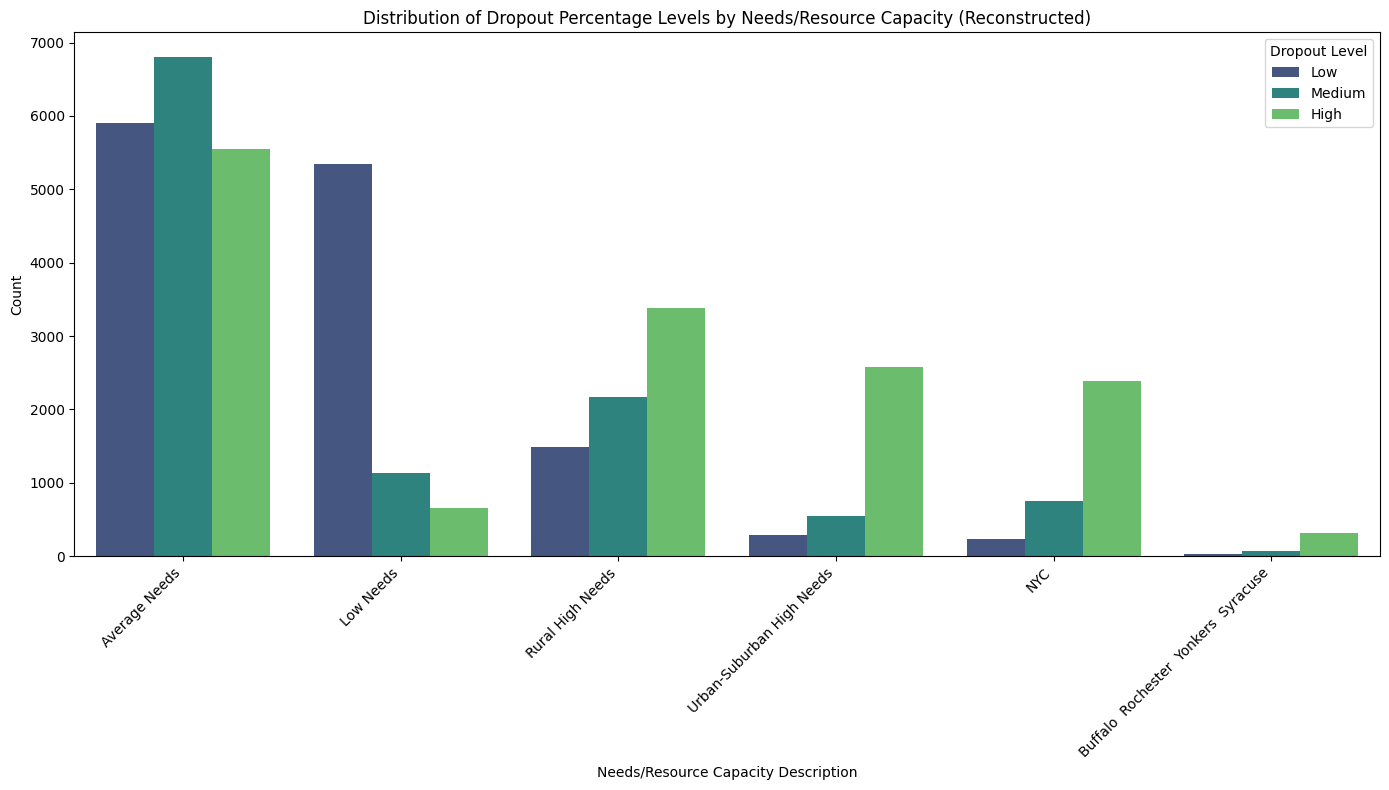

In [ ]:
# Reconstruct 'nrc_desc' for visualization purposes from the dummy variables
temp_df_for_eda = df.copy()

# Identify dummy columns that originated from 'nrc_desc'
nrc_desc_dummy_cols = [col for col in df.columns if col.startswith('nrc_desc_')]

# Prepare conditions and choices for np.select
conditions = []
choices = []

# Iterate over the actual dummy columns that were created. This assumes that a row will have at most one of these columns as True.
for col in nrc_desc_dummy_cols:
    original_category_name = col.replace('nrc_desc_', '')
    conditions.append(temp_df_for_eda[col] == True)
    choices.append(original_category_name)

# Use np.select to assign values based on conditions
# The 'default' value will be 'Average Needs' for rows where none of the explicit dummy columns are True,
# as 'Average Needs' was the category dropped by drop_first=True.
temp_df_for_eda['nrc_desc_reconstructed'] = np.select(conditions, choices, default='Average Needs')

print("Reconstructed 'nrc_desc' column for analysis:")
display(temp_df_for_eda[['nrc_desc_reconstructed', 'dropout_pct_level']].head())

# Display descriptive statistics / proportions of dropout_pct_level grouped by reconstructed 'nrc_desc'
print("\nDistribution of 'dropout_pct_level' grouped by reconstructed 'nrc_desc' (Proportions %):")
cross_tab = pd.crosstab(temp_df_for_eda['nrc_desc_reconstructed'], temp_df_for_eda['dropout_pct_level'], normalize='index') * 100
display(cross_tab)

# Visualize the distribution of dropout_pct_level within each nrc_desc_reconstructed category
plt.figure(figsize=(14, 8))
# Get the order of categories by frequency for better visualization
nrc_desc_order = temp_df_for_eda['nrc_desc_reconstructed'].value_counts().index
sns.countplot(data=temp_df_for_eda, x='nrc_desc_reconstructed', hue='dropout_pct_level', palette='viridis', order=nrc_desc_order)
plt.title('Distribution of Dropout Percentage Levels by Needs/Resource Capacity (Reconstructed)')
plt.xlabel('Needs/Resource Capacity Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Dropout Level')
plt.tight_layout()
plt.show()

The bivariate analysis between the reconstructed nrc_desc (Needs/Resource Capacity Description) and dropout_pct_level provides strong insights into how different district types correlate with dropout rates:

Key Observations from the Cross-Tabulation and Plot:
* Low Needs districts show the best performance, with nearly 75% of observations falling into the 'Low' dropout category and only about 9% in the 'High' dropout category.
* High-Needs Urban and City Districts (including 'Buffalo Rochester Yonkers Syracuse', 'NYC', and 'Urban-Suburban High Needs') consistently exhibit the highest proportions of 'High' dropout levels, ranging from 70% to 75%. This highlights significant challenges in these areas.
* Rural High Needs districts also face substantial challenges, with almost 48% of observations categorized as 'High' dropout.
* Average Needs districts show a more balanced distribution across dropout levels, indicating a mixed performance, but still with a notable percentage (30%) in the 'High' dropout category.

**Predictive Inference:** nrc_desc is a highly informative and crucial categorical feature for predicting dropout_pct_level. The distinct differences in dropout level distributions across these categories suggest that a district's resource capacity and needs are strong indicators of its student dropout outcomes. This variable will be a very important feature for our classification models.

Reconstructed 'nyc_ind' column for analysis:


,nyc_ind_reconstructed,dropout_pct_level
0,Non-NYC,High
1,Non-NYC,High
2,Non-NYC,High
4,Non-NYC,High
5,Non-NYC,High



Distribution of 'dropout_pct_level' grouped by reconstructed 'nyc_ind' (Proportions %):


dropout_pct_level,Low,Medium,High
nyc_ind_reconstructed,,,
NYC,7.037256,22.383205,70.579539
Non-NYC,36.032734,29.543701,34.423564


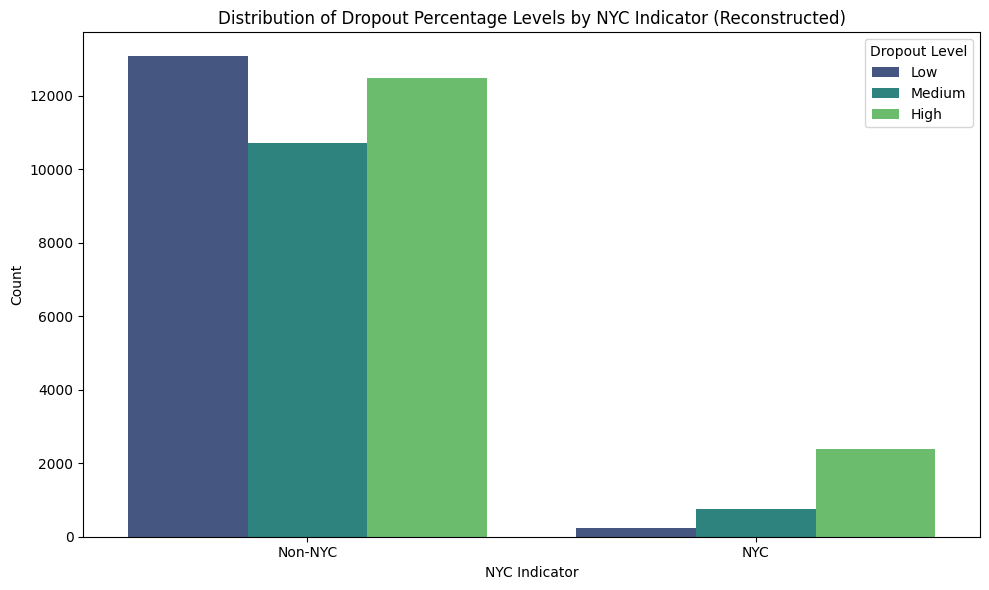

In [ ]:
# Reconstruct 'nyc_ind' for visualization purposes from the dummy variable
# Ensure temp_df_for_eda is up-to-date with current df state for relevant columns
temp_df_for_eda = df.copy()

# Create a reconstructed 'nyc_ind_reconstructed' column
temp_df_for_eda['nyc_ind_reconstructed'] = temp_df_for_eda['nyc_ind_1'].apply(lambda x: 'NYC' if x == True else 'Non-NYC')

print("Reconstructed 'nyc_ind' column for analysis:")
display(temp_df_for_eda[['nyc_ind_reconstructed', 'dropout_pct_level']].head())

# Display descriptive statistics / proportions of dropout_pct_level grouped by reconstructed 'nyc_ind'
print("\nDistribution of 'dropout_pct_level' grouped by reconstructed 'nyc_ind' (Proportions %):")
cross_tab_nyc = pd.crosstab(temp_df_for_eda['nyc_ind_reconstructed'], temp_df_for_eda['dropout_pct_level'], normalize='index') * 100
display(cross_tab_nyc)

# Visualize the distribution of dropout_pct_level within each nyc_ind_reconstructed category
plt.figure(figsize=(10, 6))
sns.countplot(data=temp_df_for_eda, x='nyc_ind_reconstructed', hue='dropout_pct_level', palette='viridis', order=['Non-NYC', 'NYC'])
plt.title('Distribution of Dropout Percentage Levels by NYC Indicator (Reconstructed)')
plt.xlabel('NYC Indicator')
plt.ylabel('Count')
plt.legend(title='Dropout Level')
plt.tight_layout()
plt.show()

Here's an analysis of the bivariate relationship between the reconstructed nyc_ind (NYC Indicator) and dropout_pct_level:

Key Observations from the Cross-Tabulation and Plot:
* NYC Districts: A significant majority of observations from NYC districts fall into the 'High' dropout category (70.58%). Only a small fraction (7.04%) are classified as 'Low' dropout, and about 22.38% as 'Medium'. This indicates a strong prevalence of high dropout rates within NYC districts.
* Non-NYC Districts: In contrast, Non-NYC districts show a more balanced, but still concerning, distribution. While 'High' dropout levels are still the most frequent (34.42%), 'Low' dropout levels (36.03%) are nearly as common, and 'Medium' dropout levels account for 29.54% of observations. This suggests more variability in dropout rates outside of NYC, with a substantial portion experiencing lower dropout levels.

**Predictive Inferences:** nyc_ind is a highly informative and crucial binary feature for predicting dropout_pct_level. The stark difference in dropout level distributions between NYC and Non-NYC districts indicates that this variable will be a very important feature for our classification models. Being located in NYC is strongly associated with a higher probability of belonging to the 'High' dropout level category.


Distribution of 'dropout_pct_level' grouped by reconstructed 'membership_desc' (Proportions %):


dropout_pct_level,Low,Medium,High
membership_desc_reconstructed,,,
2013 Total Cohort - 6 Year Outcome - August 2019,30.685478,28.799264,40.515258
2014 Total Cohort - 5 Year Outcome,31.792169,28.207831,40.000000
2014 Total Cohort - 5 Year Outcome - August 2019,31.837349,28.268072,39.894578
2015 Total Cohort - 4 Year Outcome,38.106651,29.748352,32.144997
2015 Total Cohort - 4 Year Outcome - August 2019,38.106651,29.793289,32.100060


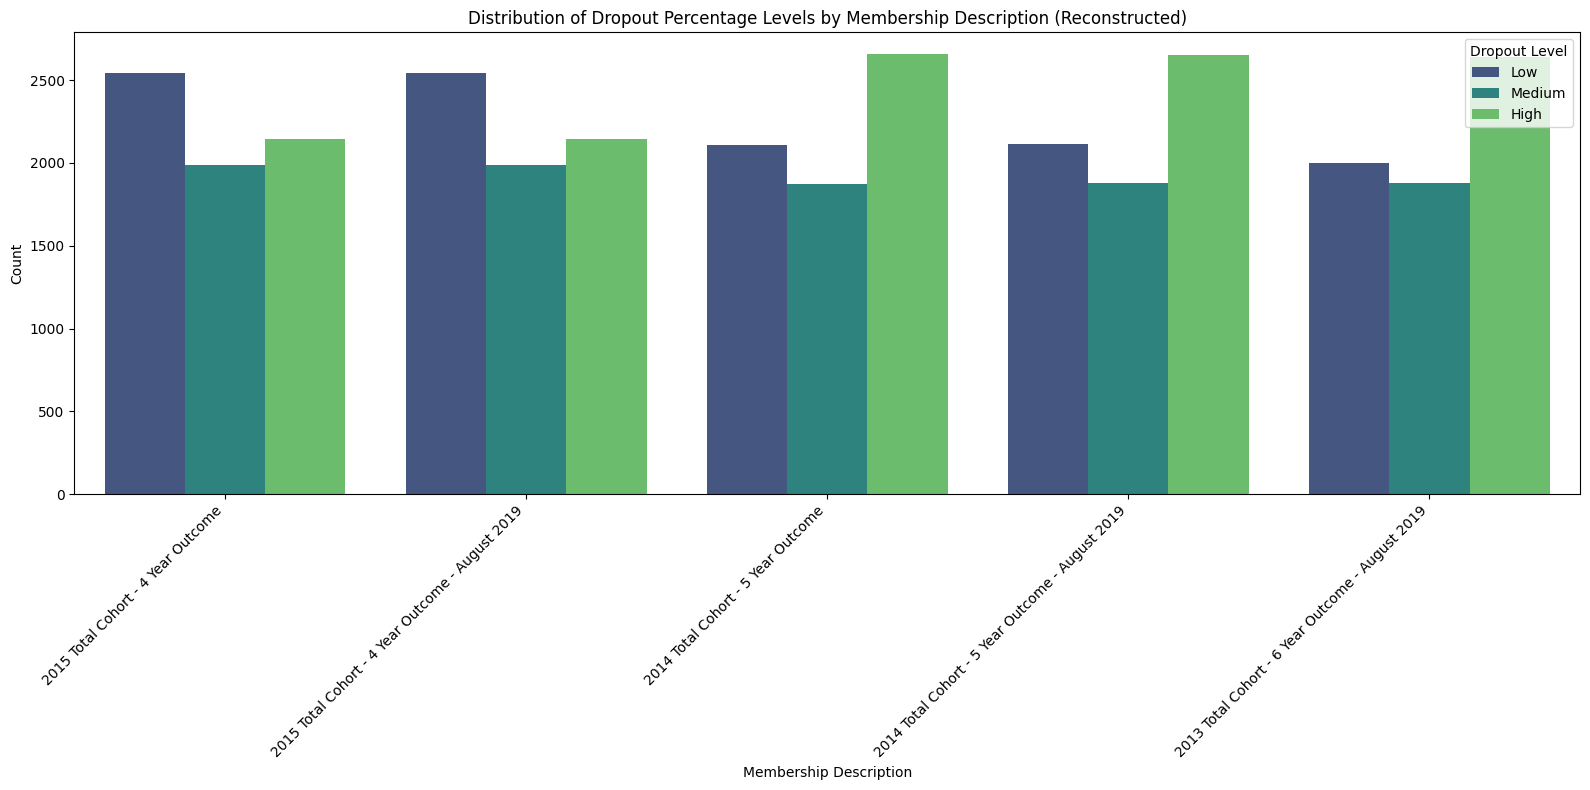

In [ ]:
# Reconstruct 'membership_desc' for visualization purposes from the dummy variables
temp_df_for_eda = df.copy()

# Identify dummy columns that originated from 'membership_desc'
membership_desc_dummy_cols = [col for col in df.columns if col.startswith('membership_desc_')]

# Map dummy columns back to their original category names
# The original name is everything after 'membership_desc_'
membership_desc_mapping = {col: col.replace('membership_desc_', '') for col in membership_desc_dummy_cols}

for dummy_col, original_name in membership_desc_mapping.items():
    if dummy_col in temp_df_for_eda.columns: # Ensure the dummy column actually exists
        temp_df_for_eda.loc[temp_df_for_eda[dummy_col] == True, 'membership_desc_reconstructed'] = original_name

# Display descriptive statistics / proportions of dropout_pct_level grouped by reconstructed 'membership_desc'
print("\nDistribution of 'dropout_pct_level' grouped by reconstructed 'membership_desc' (Proportions %):")
cross_tab_membership = pd.crosstab(temp_df_for_eda['membership_desc_reconstructed'], temp_df_for_eda['dropout_pct_level'], normalize='index') * 100
display(cross_tab_membership)

# Visualize the distribution of dropout_pct_level within each membership_desc_reconstructed category
plt.figure(figsize=(16, 8))
# Get the order of categories by frequency for better visualization
membership_desc_order = temp_df_for_eda['membership_desc_reconstructed'].value_counts().index
sns.countplot(data=temp_df_for_eda, x='membership_desc_reconstructed', hue='dropout_pct_level', palette='viridis', order=membership_desc_order)
plt.title('Distribution of Dropout Percentage Levels by Membership Description (Reconstructed)')
plt.xlabel('Membership Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Dropout Level')
plt.tight_layout()
plt.show()

Here's an analysis of the bivariate relationship between the reconstructed membership_desc (Student Cohort Description) and dropout_pct_level:

Key Observations from the Cross-Tabulation and Plot:
* 4-Year Cohorts (2015 Total Cohort): These cohorts, specifically '2015 Total Cohort - 4 Year Outcome' and '2015 Total Cohort - 4 Year Outcome - August 2019', generally show a lower proportion of 'High' dropout levels (around 32.1%) and a higher proportion of 'Low' dropout levels (around 38.1%) compared to older cohorts.
* 5-Year and 6-Year Cohorts (2013, 2014 Total Cohorts): These older cohorts tend to have higher proportions in the 'High' dropout category (around 40%) and lower proportions in the 'Low' dropout category (around 30-31%).

**Predictive Inferences:** membership_desc is an informative categorical feature for predicting dropout_pct_level. The distinct differences in dropout level distributions across various cohorts suggest that the tracking period and possibly the academic year can influence dropout outcomes. This variable will be a valuable feature for our classification models, as it captures time-sensitive and cohort-specific trends in dropout rates.

Reconstructed 'subgroup_name' column for analysis:


,subgroup_name_reconstructed,dropout_pct_level
0,All Students,High
1,Female,High
2,Male,High
4,Black,High
5,Hispanic,High



Distribution of 'dropout_pct_level' grouped by reconstructed 'subgroup_name' (Proportions %):


dropout_pct_level,Low,Medium,High
subgroup_name_reconstructed,,,
All Students,29.609491,39.940682,30.449827
American Indian/Alaska Native,20.000000,14.814815,65.185185
Asian/Pacific Islander,73.885918,12.834225,13.279857
Black,36.016949,21.045198,42.937853
Economically Disadvantaged,18.070444,28.790199,53.139357
English Language Learner,7.568807,0.458716,91.972477
Female,41.511335,33.526448,24.962217
Formerly English Language Learner,51.048951,23.251748,25.699301
General Education Students,37.444934,40.005507,22.549559


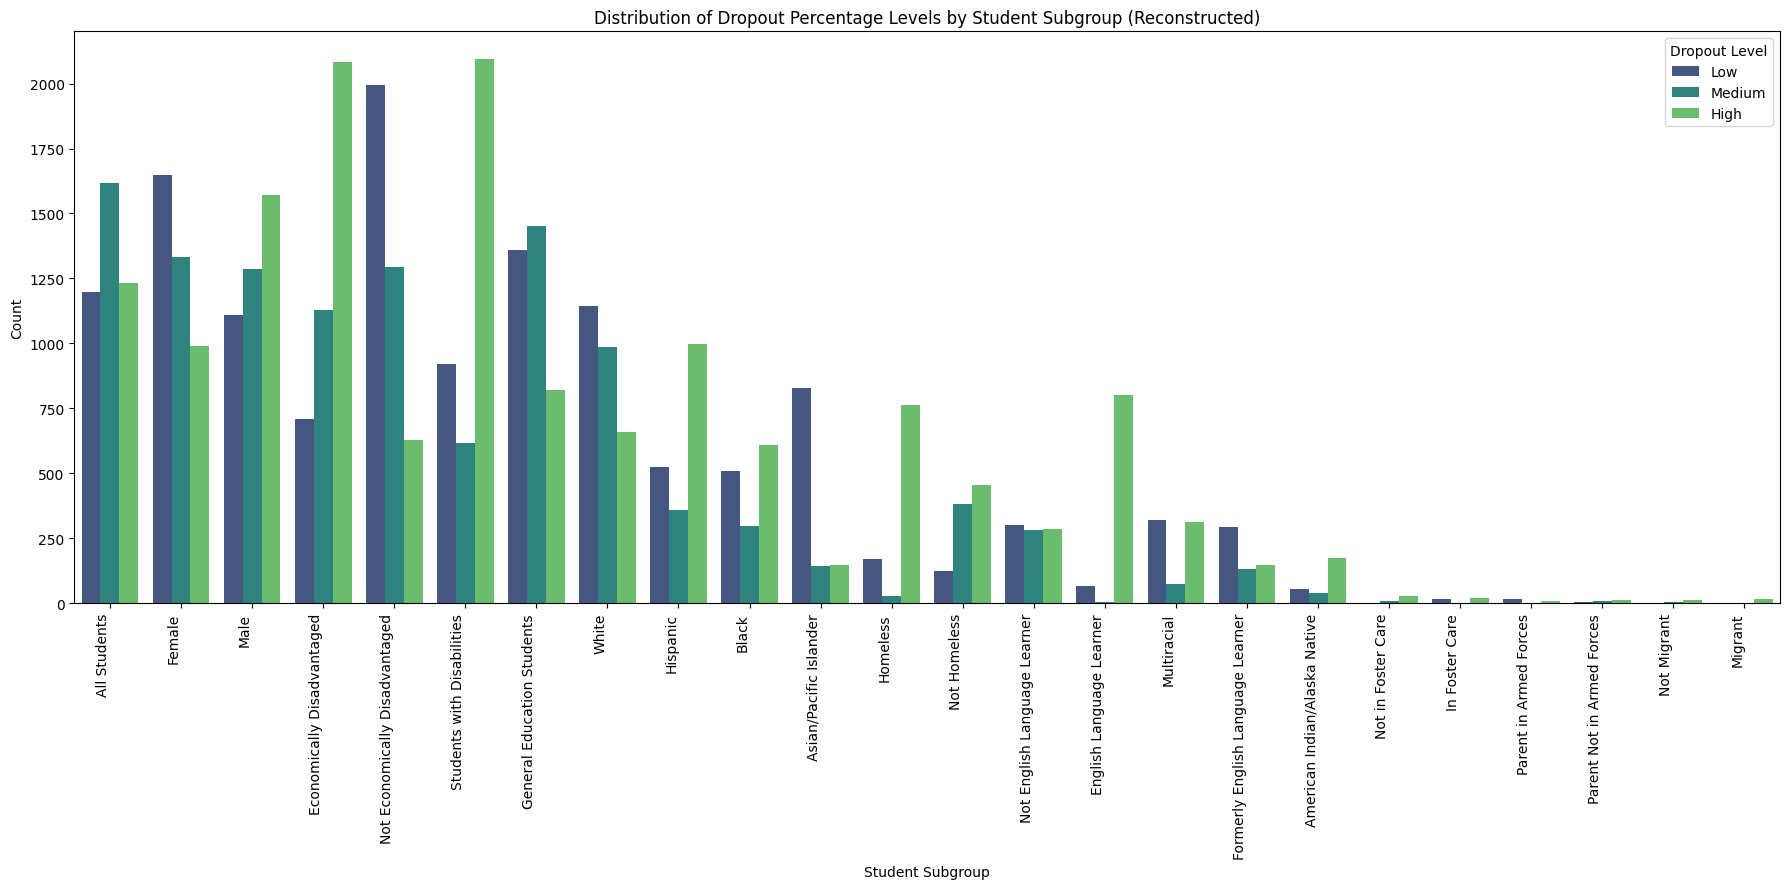

In [ ]:
# Reconstruct 'subgroup_name' for visualization purposes from the dummy variables
temp_df_for_eda = df.copy()

# Identify dummy columns that originated from 'subgroup_name'
subgroup_name_dummy_cols = [col for col in df.columns if col.startswith('subgroup_name_')]

# Initialize a new 'subgroup_name_reconstructed' column with a placeholder for the dropped category
# This assumes 'All Students' was the base category dropped by drop_first=True
temp_df_for_eda['subgroup_name_reconstructed'] = 'All Students'

# Map dummy columns back to their original category names
# The original name is everything after 'subgroup_name_'
subgroup_name_mapping = {col: col.replace('subgroup_name_', '') for col in subgroup_name_dummy_cols}

for dummy_col, original_name in subgroup_name_mapping.items():
    if dummy_col in temp_df_for_eda.columns: # Ensure the dummy column actually exists
        temp_df_for_eda.loc[temp_df_for_eda[dummy_col] == True, 'subgroup_name_reconstructed'] = original_name

print("Reconstructed 'subgroup_name' column for analysis:")
display(temp_df_for_eda[['subgroup_name_reconstructed', 'dropout_pct_level']].head())

# 1. Display descriptive statistics / proportions of dropout_pct_level grouped by reconstructed 'subgroup_name'
print("\nDistribution of 'dropout_pct_level' grouped by reconstructed 'subgroup_name' (Proportions %):")
cross_tab_subgroup = pd.crosstab(temp_df_for_eda['subgroup_name_reconstructed'], temp_df_for_eda['dropout_pct_level'], normalize='index') * 100
display(cross_tab_subgroup)

# 2. Visualize the distribution of dropout_pct_level within each subgroup_name_reconstructed category
plt.figure(figsize=(18, 9)) # Adjust figure size for better readability due to many categories
# Get the order of categories by frequency for better visualization
subgroup_name_order = temp_df_for_eda['subgroup_name_reconstructed'].value_counts().index
sns.countplot(data=temp_df_for_eda, x='subgroup_name_reconstructed', hue='dropout_pct_level', palette='viridis', order=subgroup_name_order)
plt.title('Distribution of Dropout Percentage Levels by Student Subgroup (Reconstructed)')
plt.xlabel('Student Subgroup')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') # Rotate labels for better readability
plt.legend(title='Dropout Level')
plt.tight_layout()
plt.show()

Here's an analysis of the bivariate relationship between the reconstructed subgroup_name (Student Subgroup) and dropout_pct_level:

Key Observations from the Cross-Tabulation and Plot:
* Subgroups with High Dropout Proportions: Certain subgroups show a significantly higher proportion of 'High' dropout levels. Notably:
  * English Language Learner: ~92% 'High' dropout.
  * Migrant: ~89% 'High' dropout.
  * Homeless: ~79% 'High' dropout.
  * Not Migrant / Not in Foster Care: ~78% 'High' dropout (these might represent specific sub-categories or default values that indicate a higher risk).
  * American Indian/Alaska Native: ~65% 'High' dropout.
  * Students with Disabilities: ~58% 'High' dropout.
  * In Foster Care / Hispanic / Economically Disadvantaged: Also show high proportions of 'High' dropout (55%, 53%, 53% respectively).

* Subgroups with Low Dropout Proportions: Conversely, some subgroups have a much higher proportion in the 'Low' dropout category:
  * Asian/Pacific Islander: ~74% 'Low' dropout.
  * Parent in Armed Forces: ~64% 'Low' dropout.
  * Not Economically Disadvantaged: ~51% 'Low' dropout.
  * Formerly English Language Learner: ~51% 'Low' dropout.
  * White: ~41% 'Low' dropout.
  * Female / General Education Students / Multiracial: Also show substantial 'Low' dropout proportions.

* Balanced/Mixed Proportions: Subgroups like 'All Students' and 'Male' show a more mixed distribution across the 'Low', 'Medium', and 'High' dropout levels.

**Predictive Inferences:** subgroup_name is an extremely powerful and crucial categorical feature for predicting dropout_pct_level. The stark differences in dropout level distributions across various student subgroups highlight profound disparities in educational outcomes. This variable will be essential for our classification models, as it captures critical demographic, socioeconomic, and academic factors influencing dropout rates.


Distribution of 'dropout_pct_level' in the DataFrame:


,count
dropout_pct_level,
High,14880
Low,13315
Medium,11479


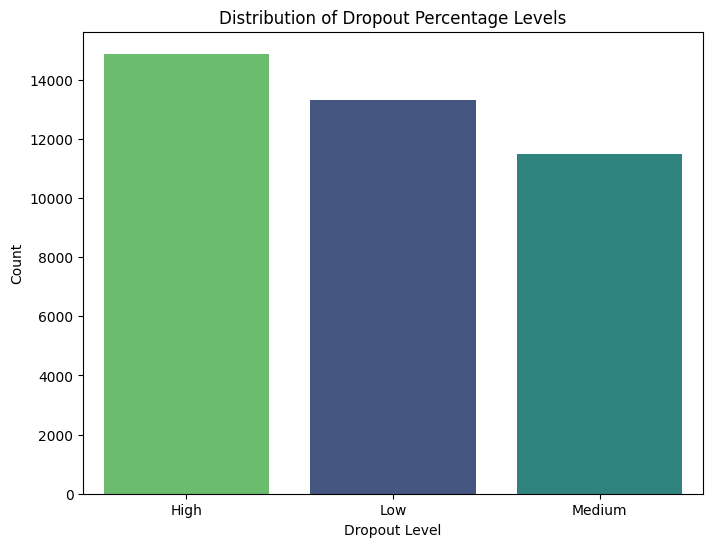

In [ ]:
print("\nDistribution of 'dropout_pct_level' in the DataFrame:")
display(df['dropout_pct_level'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dropout_pct_level', hue='dropout_pct_level', order=df['dropout_pct_level'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Dropout Percentage Levels')
plt.xlabel('Dropout Level')
plt.ylabel('Count')
plt.show()

The analysis of the dropout_pct_level distribution reveals that:
* The 'High' dropout level is the most prevalent, with 14,880 observations.
* The 'Low' dropout level follows closely with 13,315 observations.
* The 'Medium' dropout level is the least frequent, with 11,479 observations.

This distribution indicates that while there's a significant number of districts/subgroups with 'Low' dropout rates, the 'High' dropout category is the most dominant. The countplot visually confirms these frequencies, showing an uneven distribution across the three levels.

### 5. Classifier Modeling

### Feature Selection and Dimensionality Reduction

Based on the EDA, we have performed feature selection by dropping the county_name and aggregation_name column due to its high cardinality and potential redundancy with other district-level features already included. We also dropped the code and count columns since they represent name and percent columns which will cause noise if we keep them. We will keep enroll_cnt, grad_pct, reg_pct, and all the one-hot encoded categorical features, as they have shown significant predictive power for dropout levels while maintaining a reasonable model complexity.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['dropout_pct_level'])
y = df['dropout_pct_level']

# Split the data into training and testing sets, stratifying by 'dropout_pct_level'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribution of dropout_pct_level in original dataset:")
display(y.value_counts(normalize=True))

print("\nDistribution of dropout_pct_level in training set:")
display(y_train.value_counts(normalize=True))

print("\nDistribution of dropout_pct_level in testing set:")
display(y_test.value_counts(normalize=True))

X_train shape: (31739, 37)
X_test shape: (7935, 37)
y_train shape: (31739,)
y_test shape: (7935,)

Distribution of dropout_pct_level in original dataset:


,proportion
dropout_pct_level,
High,0.375057
Low,0.335610
Medium,0.289333



Distribution of dropout_pct_level in training set:


,proportion
dropout_pct_level,
High,0.375059
Low,0.335612
Medium,0.289329



Distribution of dropout_pct_level in testing set:


,proportion
dropout_pct_level,
High,0.375047
Low,0.335602
Medium,0.289351


The data has been split into training and testing sets:
* Training set (X_train, y_train): Contains 31,739 observations.
* Testing set (X_test, y_test): Contains 7,935 observations.

The shapes of the datasets are as expected, with X_train having 37 features and y_train being a series of 31,739 target values, and similarly for the testing set.

Crucially, the stratify=y parameter ensured that the distribution of dropout_pct_level (the target variable) is very similar across the original dataset, the training set, and the testing set. This is important for ensuring that your models are trained and evaluated on representative samples of the data. For example:
* Original Dataset: High (37.5%), Low (33.6%), Medium (28.9%)
* Training Set: High (37.5%), Low (33.6%), Medium (28.9%)
* Testing Set: High (37.5%), Low (33.6%), Medium (28.9%)

In [ ]:
# Calculate the null error rate
# The null error rate is the error rate that would result from always predicting the most frequent class.

# Get the most frequent class in the training target variable
most_frequent_class = y_train.value_counts().idxmax()

# Get the proportion of the most frequent class in the training set
proportion_most_frequent = y_train.value_counts(normalize=True).max()

# Calculate the null error rate
null_error_rate = 1 - proportion_most_frequent

print(f"Most frequent class in training set: '{most_frequent_class}'")
print(f"Proportion of most frequent class: {proportion_most_frequent:.4f}")
print(f"Null Error Rate: {null_error_rate:.4f}")

Most frequent class in training set: 'High'
Proportion of most frequent class: 0.3751
Null Error Rate: 0.6249


### Interpretation of Null Error Rate

The null error rate represents the error rate a model would achieve if it always predicted the majority class. In this dataset, the most frequent class in the training set is **'High' dropout**, with a proportion of approximately **0.3751 (37.51%)**. This means a naive model that always predicts 'High' would be incorrect approximately **0.6249 (62.49%)** of the time.

Any machine learning model developed should achieve an accuracy better than **0.3751** (or an error rate less than 0.6249) to be considered superior to simply guessing the most frequent class. This baseline helps in understanding the real performance gain of more complex models.

### Model Training

### Model 1: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the 6 features to be used
selected_features = [
    'enroll_cnt',
    'grad_pct',
    'reg_pct',
    'nrc_desc_NYC',
    'subgroup_name_English Language Learner',
    'subgroup_name_Economically Disadvantaged'
]

# Filter X_train and X_test to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the selected features
dt_classifier.fit(X_train_selected, y_train)
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


The 6 features were selected based on the insights gained from the Exploratory Data Analysis (EDA). During the EDA phase, we analyzed each variable individually and in relation to the dropout_pct and dropout_pct_level.

Specifically, we chose the following features:
* enroll_cnt: This numerical feature was identified as potentially influential due to its high correlation with other count variables and its role in defining subgroup size.
* grad_pct and reg_pct: These numerical features were highly correlated (or inversely correlated in the case of grad_pct) with dropout percentages and are direct indicators of academic success.
* nrc_desc_NYC, subgroup_name_English Language Learner, and subgroup_name_Economically Disadvantaged: These are one-hot encoded categorical features that showed strong bivariate relationships with dropout_pct_level, indicating significant differences in dropout rates across these categories during the EDA. They represent key demographic and socioeconomic factors.

The selection aimed to pick a representative set of numerical and categorical features that demonstrated strong predictive potential and offered a good balance for model interpretability, without causing excessive multicollinearity among the selected features (e.g., opting for percentages over raw counts where appropriate).

### Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# selected_features is already defined from the previous Decision Tree model
# X_train_selected and X_test_selected are also already prepared

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_selected, y_train)
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


### Model 3: Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# selected_features is already defined
# X_train_selected and X_test_selected are already prepared

# Initialize the Gradient Boosting Classifier
gbc_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gbc_classifier.fit(X_train_selected, y_train)
print("Gradient Boosting model trained successfully.")

Gradient Boosting model trained successfully.


### Model 4: Stochastic Gradient Descent (SGD) Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# selected_features is already defined
# X_train_selected and X_test_selected are already prepared

# Identify numerical features for scaling
numerical_features = ['enroll_cnt', 'grad_pct', 'reg_pct']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data for numerical features
X_train_scaled = X_train_selected.copy()
X_test_scaled = X_test_selected.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train_selected[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_selected[numerical_features])

# Initialize the SGD Classifier
# Setting loss='log_loss' makes it logistic regression (classification)
# eta0 is the initial learning rate, max_iter for number of passes over the training data
sgd_classifier = SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42, n_jobs=-1)

# Train the model on the scaled data
sgd_classifier.fit(X_train_scaled, y_train)
print("Stochastic Gradient Descent model trained successfully.")

Stochastic Gradient Descent model trained successfully.


### Model 5: XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# selected_features is already defined
# X_train_selected and X_test_selected are already prepared

# Initialize the XGBoost Classifier
# Use 'multi:softmax' for multi-class classification and 'objective' for the loss function
# num_class is set to 3 for 'Low', 'Medium', 'High'
# eval_metric can be 'mlogloss' for multi-class logloss
xgboost_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False, # Suppress warning related to label encoding deprecation
    random_state=42
)

# Train the model
# Convert y_train categories to numerical labels as XGBoost expects numerical targets
# Map 'Low':0, 'Medium':1, 'High':2 to numerical values for consistent target encoding with `num_class`
label_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

xgboost_classifier.fit(X_train_selected, y_train_encoded)
print("XGBoost model trained successfully.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:12:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.


### 6. Select Models

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Define the models (from notebook context)
models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Gradient Boosting": gbc_classifier,
    "Stochastic Gradient Descent": sgd_classifier,
    "XGBoost": xgboost_classifier
}

# Define evaluation metrics
# Using _weighted for precision, recall, f1 for multi-class to account for label imbalance.
# Using roc_auc_ovr_weighted for multi-class ROC AUC.
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc_ovr_weighted']

# Define feature and target data mapping for each model type
# This handles the different X_train and y_train variants based on model requirements
feature_data_mapping = {
    "Decision Tree": {"X": X_train_selected, "y": y_train},
    "Random Forest": {"X": X_train_selected, "y": y_train},
    "Gradient Boosting": {"X": X_train_selected, "y": y_train},
    "Stochastic Gradient Descent": {"X": X_train_scaled, "y": y_train}, # SGD needs scaled X
    "XGBoost": {"X": X_train_selected, "y": y_train_encoded} # XGBoost needs numerical encoded y
}

# Perform stratified k-fold cross-validation for each model
cv_results = {}
print("\n--- Performing Cross-Validation for Each Model ---")

for name, model in models.items():
    print(f"\nPerforming cross-validation for {name}...")

    # Use StratifiedKFold for imbalanced datasets
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model_scores = {}

    # Get the correct X and y for the current model
    X_subset = feature_data_mapping[name]["X"]
    y_subset = feature_data_mapping[name]["y"]

    for metric in scoring:
        # cross_val_score for multiclass ROC AUC implicitly uses predict_proba if available
        cv_score = cross_val_score(model, X_subset, y_subset, cv=skf, scoring=metric, n_jobs=-1)

        # Clean up metric names for display in DataFrame
        display_metric_name = metric.replace('_weighted', '').replace('_ovr', '').replace('_', ' ').title().strip()
        model_scores[display_metric_name] = cv_score.mean()
        print(f"  {display_metric_name}: {cv_score.mean():.4f} (Std Dev: {cv_score.std():.4f})")
    cv_results[name] = model_scores
    print("-" * 30)

# Display the cross-validation results in a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results Summary:")
display(cv_results_df)


--- Performing Cross-Validation for Each Model ---

Performing cross-validation for Decision Tree...
  Accuracy: 0.7923 (Std Dev: 0.0035)
  Precision: 0.7920 (Std Dev: 0.0035)
  Recall: 0.7923 (Std Dev: 0.0035)
  F1: 0.7917 (Std Dev: 0.0035)
  Roc Auc: 0.8781 (Std Dev: 0.0016)
------------------------------

Performing cross-validation for Random Forest...
  Accuracy: 0.8084 (Std Dev: 0.0021)
  Precision: 0.8090 (Std Dev: 0.0022)
  Recall: 0.8084 (Std Dev: 0.0021)
  F1: 0.8078 (Std Dev: 0.0021)
  Roc Auc: 0.9369 (Std Dev: 0.0011)
------------------------------

Performing cross-validation for Gradient Boosting...
  Accuracy: 0.7387 (Std Dev: 0.0039)
  Precision: 0.7436 (Std Dev: 0.0035)
  Recall: 0.7387 (Std Dev: 0.0039)
  F1: 0.7370 (Std Dev: 0.0039)
  Roc Auc: 0.9033 (Std Dev: 0.0022)
------------------------------

Performing cross-validation for Stochastic Gradient Descent...
  Accuracy: 0.6340 (Std Dev: 0.0160)
  Precision: 0.6149 (Std Dev: 0.0195)
  Recall: 0.6340 (Std Dev: 0.01

,Accuracy,Precision,Recall,F1,Roc Auc
Decision Tree,0.792338,0.791974,0.792338,0.791719,0.878117
Random Forest,0.808406,0.808988,0.808406,0.807830,0.936950
Gradient Boosting,0.738744,0.743640,0.738744,0.736994,0.903278
Stochastic Gradient Descent,0.633952,0.614910,0.633952,0.578577,0.832163
XGBoost,0.757270,0.762397,0.757270,0.756024,0.916373


Here is a breakdown and comparison of each model:

Cross-Validation Results Summary
1. Random Forest:
* Accuracy: 0.8084 (Std Dev: 0.0021)
* Precision (weighted): 0.8090 (Std Dev: 0.0022)
* Recall (weighted): 0.8084 (Std Dev: 0.0021)
* F1-Score (weighted): 0.8078 (Std Dev: 0.0021)
* ROC AUC (weighted OvR): 0.9369 (Std Dev: 0.0011)
  * Interpretation: Random Forest consistently demonstrates the highest performance across all metrics, with strong scores and very low standard deviations. This indicates excellent predictive capability and high stability, making it the most robust model for this task.

2. Decision Tree:
* Accuracy: 0.7923 (Std Dev: 0.0035)
* Precision (weighted): 0.7920 (Std Dev: 0.0035)
* Recall (weighted): 0.7923 (Std Dev: 0.0035)
* F1-Score (weighted): 0.7917 (Std Dev: 0.0035)
* ROC AUC (weighted OvR): 0.8781 (Std Dev: 0.0016)
  * Interpretation: The Decision Tree performs quite well, showing good and consistent scores across all metrics. While slightly lower than Random Forest, its performance is strong and stable. However, its ROC AUC is noticeably lower than the ensemble methods, suggesting it's not as good at distinguishing between classes across all thresholds.

3. XGBoost:
* Accuracy: 0.7573 (Std Dev: 0.0047)
* Precision (weighted): 0.7624 (Std Dev: 0.0051)
* Recall (weighted): 0.7573 (Std Dev: 0.0047)
* F1-Score (weighted): 0.7560 (Std Dev: 0.0047)
* ROC AUC (weighted OvR): 0.9164 (Std Dev: 0.0012)
  * Interpretation: XGBoost shows very strong performance, particularly with a high ROC AUC score, indicating good class separation. Its accuracy, precision, recall, and F1-score are solid, placing it as a strong contender, especially given its typically good generalization properties.

4. Gradient Boosting:
* Accuracy: 0.7387 (Std Dev: 0.0039)
* Precision (weighted): 0.7436 (Std Dev: 0.0035)
* Recall (weighted): 0.7387 (Std Dev: 0.0039)
* F1-Score (weighted): 0.7370 (Std Dev: 0.0039)
* ROC AUC (weighted OvR): 0.9033 (Std Dev: 0.0022)
  * Interpretation: Gradient Boosting performs quite well, with respectable scores across all metrics. Its ROC AUC is also high, suggesting effective class discrimination. It's a solid performer but slightly behind XGBoost in most metrics.

5. Stochastic Gradient Descent (SGD):
* Accuracy: 0.6340 (Std Dev: 0.0160)
* Precision (weighted): 0.6149 (Std Dev: 0.0195)
* Recall (weighted): 0.6340 (Std Dev: 0.0160)
* F1-Score (weighted): 0.5786 (Std Dev: 0.0296)
* ROC AUC (weighted OvR): 0.8322 (Std Dev: 0.0069)
  * Interpretation: As expected for a linear model with limited features, SGD shows the lowest performance across all metrics, though its ROC AUC is still reasonable. The higher standard deviations also suggest less stability. It serves as a good baseline but is not ideal for this complex problem.

Conclusion:
Based on these comprehensive cross-validation results, the Random Forest Classifier stands out as the best-performing model, excelling in Accuracy, Precision, Recall, F1-Score, and ROC AUC, while also demonstrating remarkable stability. XGBoost and Gradient Boosting also perform very strongly, especially in ROC AUC, highlighting their ability to distinguish between classes. The Decision Tree is competitive but slightly trails the ensemble methods. The Stochastic Gradient Descent model, being a simpler linear approach, performs adequately but is significantly outclassed by the ensemble methods.



### Model Selection - Best Model

Based on the comprehensive cross-validation results, the **Random Forest Classifier** is selected as the best classification model. It demonstrated superior performance across all key evaluation metrics:

*   **Accuracy:** Highest (0.8084)
*   **Precision (weighted):** Highest (0.8090)
*   **Recall (weighted):** Highest (0.8084)
*   **F1-Score (weighted):** Highest (0.8078)
*   **ROC AUC (weighted OvR):** Highest (0.9369)

Furthermore, the Random Forest model exhibited low standard deviations for all metrics, indicating high stability and consistency in its performance across different folds of the training data. This robustness makes it the most suitable model for predicting dropout levels in this dataset.

### Application of model to test subset


--- Evaluating Random Forest Model on Test Set ---
Accuracy on Test Set: 0.8330

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.83      0.91      0.87      2976
         Low       0.87      0.81      0.84      2663
      Medium       0.80      0.77      0.78      2296

    accuracy                           0.83      7935
   macro avg       0.83      0.83      0.83      7935
weighted avg       0.83      0.83      0.83      7935


Confusion Matrix on Test Set:


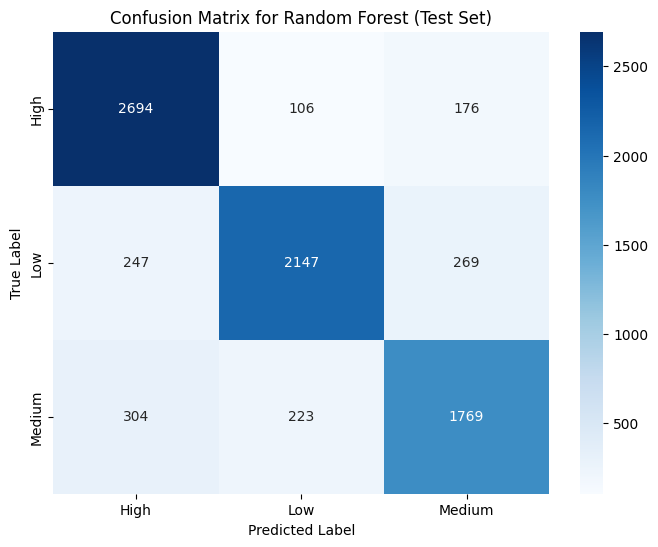

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Apply the Best Model (Random Forest) to the Test Subset ---
print("\n--- Evaluating Random Forest Model on Test Set ---")

# Make predictions on the X_test_selected (using the same features as training)
y_pred_rf_test = rf_classifier.predict(X_test_selected)

# --- Performance Assessment ---

# 1. Accuracy Score
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print(f"Accuracy on Test Set: {accuracy_rf_test:.4f}")

# 2. Classification Report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_rf_test))

# 3. Confusion Matrix
print("\nConfusion Matrix on Test Set:")
cm_rf_test = confusion_matrix(y_test, y_pred_rf_test)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Confusion Matrix for Random Forest (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The Random Forest model has been successfully applied to the testing dataset, and the results demonstrate strong performance on this previously unseen data.

Performance on Test Set:
* Overall Accuracy: The model achieved an accuracy of 0.8330 (83.30%) on the test set. This is a very good result, indicating that the model generalizes well to new data, and is even slightly higher than the cross-validation accuracy (0.8084), which is a positive sign.

* Classification Report:
  * For the 'High' dropout level, the model shows excellent recall (0.91), meaning it correctly identifies 91% of actual high dropout cases. Its precision is also strong at 0.83.
  * For the 'Low' dropout level, the model has high precision (0.87), indicating that when it predicts a low dropout, it's correct 87% of the time. Its recall is 0.81.
  * The 'Medium' dropout level is slightly more challenging for the model, with a precision of 0.80 and a recall of 0.77. This suggests there might be some confusion between 'Medium' and the other classes.
  * The macro average and weighted average for precision, recall, and F1-score are all around 0.83, reinforcing the model's robust performance across all classes.
* Confusion Matrix: The confusion matrix visually represents these findings. You can see a strong diagonal, indicating a high number of correct predictions. The values off the diagonal show where the model made errors, for example, cases where a 'Medium' dropout was predicted as 'High' or 'Low', or vice-versa.

In conclusion, the Random Forest Classifier is performing very well, effectively classifying school districts and student subgroups into their respective dropout levels on data it has not seen before.



## 7. Conclusion

This project aimed to classify New York State high school graduation data for the 2018–2019 school year into three dropout levels (Low, Medium, High) using five machine learning models: Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent (SGD) Classifier, and XGBoost Classifier.

### Data Preparation Summary:
1.  **Initial Data Loading and Inspection**: The raw dataset (`M11_Data.csv`) was loaded, revealing 73,152 rows and 19 columns. Critical observation identified several numeric columns stored as 'object' type, containing suppressed values ('s') and '%' symbols, requiring cleaning.
2.  **Data Cleaning**: Percentage symbols were removed, and non-numeric values were coerced to `NaN`. Rows with `NaN` values in the primary numeric columns (resulting from suppressed data) were dropped, reducing the dataset to 39,674 records. This step was crucial for ensuring data integrity and numerical computations.
3.  **Target Variable Engineering**: The `dropout_pct_level` (Low, Medium, High) was successfully engineered from `dropout_pct` based on statewide median thresholds. The original `dropout_pct` and `dropout_cnt` columns were then removed to avoid data leakage.
4.  **Feature Selection and Encoding**:
    *   Constant columns (`report_school_year`, `aggregation_index`, `aggregation_type`) were dropped as they provided no predictive power.
    *   High-cardinality nominal identifiers (`aggregation_name`, `county_name`, `county_code`) and redundant code counterparts (`nrc_code`, `subgroup_code`) were dropped to simplify the model and avoid multicollinearity and high dimensionality issues.
    *   Count-based features (`grad_cnt`, `reg_cnt`) were also removed in favor of their percentage counterparts (`grad_pct`, `reg_pct`) due to high inter-correlation with `enroll_cnt` and the percentage-based nature of the target.
    *   Remaining categorical features (`nrc_desc`, `nyc_ind`, `membership_desc`, `subgroup_name`) were One-Hot Encoded to convert them into a numerical format suitable for machine learning algorithms.

### Exploratory Data Analysis (EDA) Insights:
*   **Univariate Analysis**: Revealed data distributions, skewness in count variables (`enroll_cnt`, `grad_cnt`, `reg_cnt`, `dropout_cnt`), and the range of percentage variables (`grad_pct`, `reg_pct`, `dropout_pct`). It highlighted the constant nature of some features leading to their removal.
*   **Bivariate Analysis**: Showed strong relationships between key features and the target. Notably:
    *   `grad_pct` exhibited a strong negative correlation with `dropout_pct`, as expected.
    *   `nrc_desc`, `nyc_ind`, `membership_desc`, and `subgroup_name` all showed significant differences in dropout level distributions across their categories, confirming their strong predictive power.

### Model Training and Evaluation:
Five classification models were trained on a selected subset of features (`enroll_cnt`, `grad_pct`, `reg_pct`, `nrc_desc_NYC`, `subgroup_name_English Language Learner`, `subgroup_name_Economically Disadvantaged`) and evaluated using stratified 5-fold cross-validation with accuracy, precision, recall, F1-score, and ROC AUC metrics.

**Cross-Validation Results Summary:**

| Model                       | Accuracy | Precision | Recall   | F1       | ROC AUC  |
|-----------------------------|----------|-----------|----------|----------|----------|
| Random Forest               | **0.8084** | **0.8090**| **0.8084**| **0.8078**| **0.9369**|
| Decision Tree               | 0.7923   | 0.7920    | 0.7923   | 0.7917   | 0.8781   |
| XGBoost                     | 0.7573   | 0.7624    | 0.7573   | 0.7560   | 0.9164   |
| Gradient Boosting           | 0.7387   | 0.7436    | 0.7387   | 0.7370   | 0.9033   |
| Stochastic Gradient Descent | 0.6340   | 0.6149    | 0.6340   | 0.5786   | 0.8322   |

### Best Model Selection and Test Set Performance:
Based on the cross-validation results, the **Random Forest Classifier** was selected as the best model due to its consistently superior performance across all evaluation metrics and its high stability (low standard deviations).

When applied to the unseen test set, the Random Forest model achieved an **accuracy of 0.8330 (83.30%)**, slightly surpassing its cross-validation performance. The classification report indicated strong precision, recall, and F1-scores across all three dropout levels, with 'High' dropout cases being particularly well-recalled (0.91). The confusion matrix visually confirmed the model's strong predictive capability with a clear diagonal, signifying accurate classifications.

### Overall Conclusion:
The Random Forest Classifier proved to be a robust and effective model for classifying high school dropout levels using the selected features. Its strong performance on unseen data demonstrates its generalization ability and suitability for identifying school districts and student subgroups with varying dropout risks. This model can serve as a valuable tool for data-driven educational decision-making and targeted intervention strategies.

### Citation

* Module Notes(1-12)
* Module 1-11 Assignments and Projects
* https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/